In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
from datetime import datetime

In [49]:
gold = yf.download(tickers = 'GC=F',
                     period = 'max',
                     interval = '1d').reset_index()

gold = gold.rename(columns = {'Open': 'gold_open', 'High': 'gold_high', 'Low': 'gold_low', 'Close': 'gold_close', 'Adj Close': 'gold_adj_close', 'Volume': 'gold_volume'})
gold.head()

[*********************100%%**********************]  1 of 1 completed


Date   gold_open   gold_high    gold_low  gold_close  gold_adj_close  \
0 2000-08-30  273.899994  273.899994  273.899994  273.899994      273.899994   
1 2000-08-31  274.799988  278.299988  274.799988  278.299988      278.299988   
2 2000-09-01  277.000000  277.000000  277.000000  277.000000      277.000000   
3 2000-09-05  275.799988  275.799988  275.799988  275.799988      275.799988   
4 2000-09-06  274.200012  274.200012  274.200012  274.200012      274.200012   

   gold_volume  
0            0  
1            0  
2            0  
3            2  
4            0

In [50]:
uero_usd = yf.download(tickers = 'EURUSD=X' , period = 'max' , interval = '1d').reset_index()
uero_usd = uero_usd.rename(columns = {'Open': 'euro_usd_open' , 'High' : 'euro_usd_high' , 'Low': 'euro_usd_low' , 'Close':'euro_usd_close' , 'Adj Close':'euro_usd_adj_close' , 'Volume': 'euro_usd_volume'})
uero_usd.head()

[*********************100%%**********************]  1 of 1 completed


Date  euro_usd_open  euro_usd_high  euro_usd_low  euro_usd_close  \
0 2003-12-01       1.203398       1.204007      1.194401        1.196501   
1 2003-12-02       1.196101       1.210903      1.194600        1.208897   
2 2003-12-03       1.209000       1.213003      1.207700        1.212298   
3 2003-12-04       1.212004       1.214403      1.204398        1.208094   
4 2003-12-05       1.207802       1.219096      1.206593        1.218695   

   euro_usd_adj_close  euro_usd_volume  
0            1.196501                0  
1            1.208897                0  
2            1.212298                0  
3            1.208094                0  
4            1.218695                0

In [51]:
sp500 = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d").reset_index()
sp500 = sp500.rename(columns={'Open': 'sp500_open', 'High': 'sp500_high', 'Low': 'sp500_low', 'Close': 'sp500_close', 'Adj Close': 'sp500_adj_close', 'Volume': 'sp500_volume'})
sp500.head()

[*********************100%%**********************]  1 of 1 completed


Date  sp500_open  sp500_high  sp500_low  sp500_close  sp500_adj_close  \
0 1927-12-30   17.660000   17.660000  17.660000    17.660000        17.660000   
1 1928-01-03   17.760000   17.760000  17.760000    17.760000        17.760000   
2 1928-01-04   17.719999   17.719999  17.719999    17.719999        17.719999   
3 1928-01-05   17.549999   17.549999  17.549999    17.549999        17.549999   
4 1928-01-06   17.660000   17.660000  17.660000    17.660000        17.660000   

   sp500_volume  
0             0  
1             0  
2             0  
3             0  
4             0

In [52]:
xmr = yf.Ticker("XMR-USD")
df = yf.download(tickers = 'XMR-USD' ,
                 period = 'max',
                 interval = '1d').reset_index()
df.head()

[*********************100%%**********************]  1 of 1 completed


Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  112.531998  123.404999  112.219002  120.779999  120.779999   
1 2017-11-10  121.344002  121.665001  101.757004  105.585999  105.585999   
2 2017-11-11  105.750000  127.106003  103.877998  119.615997  119.615997   
3 2017-11-12  119.597000  133.675003  110.617996  123.856003  123.856003   
4 2017-11-13  128.960007  136.528000  120.921997  123.402000  123.402000   

      Volume  
0   86864600  
1   84614000  
2  107708000  
3  144948000  
4  116200000

In [53]:
df.loc[0 , 'price_increase'] = 0
for i in range(1, len(df)):
  df.loc[i , 'price_increase'] = 1 if df.loc[i-1 , 'Close'] < df.loc[i , 'Close'] else 0
df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  112.531998  123.404999  112.219002  120.779999  120.779999   
1 2017-11-10  121.344002  121.665001  101.757004  105.585999  105.585999   
2 2017-11-11  105.750000  127.106003  103.877998  119.615997  119.615997   
3 2017-11-12  119.597000  133.675003  110.617996  123.856003  123.856003   
4 2017-11-13  128.960007  136.528000  120.921997  123.402000  123.402000   

      Volume  price_increase  
0   86864600             0.0  
1   84614000             0.0  
2  107708000             1.0  
3  144948000             1.0  
4  116200000             0.0

In [54]:
df = df.merge(gold , on='Date' , how = 'left').merge(uero_usd , on ='Date' , how = 'left').merge(sp500 , on = 'Date' , how = 'left')
df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  112.531998  123.404999  112.219002  120.779999  120.779999   
1 2017-11-10  121.344002  121.665001  101.757004  105.585999  105.585999   
2 2017-11-11  105.750000  127.106003  103.877998  119.615997  119.615997   
3 2017-11-12  119.597000  133.675003  110.617996  123.856003  123.856003   
4 2017-11-13  128.960007  136.528000  120.921997  123.402000  123.402000   

      Volume  price_increase    gold_open    gold_high  ...  euro_usd_low  \
0   86864600             0.0  1279.699951  1286.900024  ...      1.158641   
1   84614000             0.0  1283.500000  1283.500000  ...      1.162399   
2  107708000             1.0          NaN          NaN  ...           NaN   
3  144948000             1.0          NaN          NaN  ...           NaN   
4  116200000             0.0  1277.300049  1277.300049  ...      1.163873   

   euro_usd_close  euro_usd_adj_close  euro_usd_volume   sp500_open  \
0        1.159689            1.159689              0.0  2584.000000   
1        1.164687            1.164687              0.0  2580.179932   
2             NaN                 NaN              NaN          NaN   
3             NaN                 NaN              NaN          NaN   
4        1.166113            1.166113              0.0  2576.530029   

    sp500_high    sp500_low  sp500_close  sp500_adj_close  sp500_volume  
0  2586.500000  2566.330078  2584.620117      2584.620117  3.844100e+09  
1  2583.810059  2575.570068  2582.300049      2582.300049  3.489740e+09  
2          NaN          NaN          NaN              NaN           NaN  
3          NaN          NaN          NaN              NaN           NaN  
4  2587.659912  2574.479980  2584.840088      2584.840088  3.405200e+09  

[5 rows x 26 columns]

<Axes: ylabel='Frequency'>

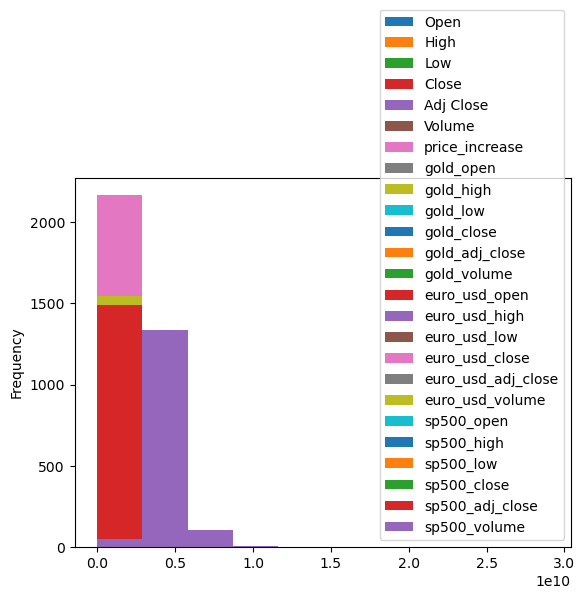

In [55]:
df.plot(kind = 'hist')

In [56]:
!gdown 11NUjXNzuFnBd0MShJYq-RlrFeepMHUrA
!gdown 1WUNRZJgU0f5NaC-6Z0n_mMvt6P9yNV1U

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [57]:
date_parser = lambda x: datetime.strptime(x , "%Y-%m-%dT%H:%M:%SZ").date()\

xmr_hash = pd.read_csv('./XMR_hash.csv' , index_col = 0 , parse_dates = ["time"] , date_parser = date_parser)
xmr_difficulty = pd.read_csv('./XMR_difficulty.csv' , index_col = 0 , parse_dates = ['time'] , date_parser = date_parser)
xmr_hash.head()

time_stamp         hash       time
0  1.442190e+12  12514082.15 2015-09-14
1  1.442280e+12  13361330.16 2015-09-15
2  1.442360e+12  13065948.13 2015-09-16
3  1.442450e+12  12663854.33 2015-09-17
4  1.442530e+12  12198340.44 2015-09-18

In [58]:
xmr_difficulty.head()

time_stamp    difficulty       time
0  1442188800000  7.508450e+08 2015-09-14
1  1442275200000  8.016798e+08 2015-09-15
2  1442361600000  7.839569e+08 2015-09-16
3  1442448000000  7.598313e+08 2015-09-17
4  1442534400000  7.319005e+08 2015-09-18

In [59]:
df = xmr_hash.sort_values(by = ['time' , 'time_stamp']).drop_duplicates(subset='time' , keep = 'last').merge(df , left_on = 'time' , right_on = 'Date')
df.head()

time_stamp         hash       time       Date        Open        High  \
0  1.510190e+12  233898872.2 2017-11-09 2017-11-09  112.531998  123.404999   
1  1.510270e+12  233778227.0 2017-11-10 2017-11-10  121.344002  121.665001   
2  1.510360e+12  233778227.0 2017-11-11 2017-11-11  105.750000  127.106003   
3  1.510440e+12  233778227.0 2017-11-12 2017-11-12  119.597000  133.675003   
4  1.510530e+12  233778227.0 2017-11-13 2017-11-13  128.960007  136.528000   

          Low       Close   Adj Close     Volume  ...  euro_usd_low  \
0  112.219002  120.779999  120.779999   86864600  ...      1.158641   
1  101.757004  105.585999  105.585999   84614000  ...      1.162399   
2  103.877998  119.615997  119.615997  107708000  ...           NaN   
3  110.617996  123.856003  123.856003  144948000  ...           NaN   
4  120.921997  123.402000  123.402000  116200000  ...      1.163873   

   euro_usd_close  euro_usd_adj_close  euro_usd_volume   sp500_open  \
0        1.159689            1.159689              0.0  2584.000000   
1        1.164687            1.164687              0.0  2580.179932   
2             NaN                 NaN              NaN          NaN   
3             NaN                 NaN              NaN          NaN   
4        1.166113            1.166113              0.0  2576.530029   

    sp500_high    sp500_low  sp500_close  sp500_adj_close  sp500_volume  
0  2586.500000  2566.330078  2584.620117      2584.620117  3.844100e+09  
1  2583.810059  2575.570068  2582.300049      2582.300049  3.489740e+09  
2          NaN          NaN          NaN              NaN           NaN  
3          NaN          NaN          NaN              NaN           NaN  
4  2587.659912  2574.479980  2584.840088      2584.840088  3.405200e+09  

[5 rows x 29 columns]

In [60]:
df = xmr_difficulty.sort_values(by = ['time' , 'time_stamp']).drop_duplicates(subset = 'time' , keep='last').merge(df , on = 'time')
df.head()

time_stamp_x    difficulty       time  time_stamp_y         hash  \
0  1510185600000  2.806786e+10 2017-11-09  1.510190e+12  233898872.2   
1  1510272000000  2.805339e+10 2017-11-10  1.510270e+12  233778227.0   
2  1510358400000  2.805339e+10 2017-11-11  1.510360e+12  233778227.0   
3  1510444800000  2.805339e+10 2017-11-12  1.510440e+12  233778227.0   
4  1510531200000  2.805339e+10 2017-11-13  1.510530e+12  233778227.0   

        Date        Open        High         Low       Close  ...  \
0 2017-11-09  112.531998  123.404999  112.219002  120.779999  ...   
1 2017-11-10  121.344002  121.665001  101.757004  105.585999  ...   
2 2017-11-11  105.750000  127.106003  103.877998  119.615997  ...   
3 2017-11-12  119.597000  133.675003  110.617996  123.856003  ...   
4 2017-11-13  128.960007  136.528000  120.921997  123.402000  ...   

   euro_usd_low  euro_usd_close  euro_usd_adj_close  euro_usd_volume  \
0      1.158641        1.159689            1.159689              0.0   
1      1.162399        1.164687            1.164687              0.0   
2           NaN             NaN                 NaN              NaN   
3           NaN             NaN                 NaN              NaN   
4      1.163873        1.166113            1.166113              0.0   

    sp500_open   sp500_high    sp500_low  sp500_close  sp500_adj_close  \
0  2584.000000  2586.500000  2566.330078  2584.620117      2584.620117   
1  2580.179932  2583.810059  2575.570068  2582.300049      2582.300049   
2          NaN          NaN          NaN          NaN              NaN   
3          NaN          NaN          NaN          NaN              NaN   
4  2576.530029  2587.659912  2574.479980  2584.840088      2584.840088   

   sp500_volume  
0  3.844100e+09  
1  3.489740e+09  
2           NaN  
3           NaN  
4  3.405200e+09  

[5 rows x 31 columns]

In [61]:
df.isna().sum()

time_stamp_x            0
difficulty              0
time                    0
time_stamp_y            0
hash                    0
Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
price_increase          0
gold_open             672
gold_high             672
gold_low              672
gold_close            672
gold_adj_close        672
gold_volume           672
euro_usd_open         619
euro_usd_high         619
euro_usd_low          619
euro_usd_close        619
euro_usd_adj_close    619
euro_usd_volume       619
sp500_open            671
sp500_high            671
sp500_low             671
sp500_close           671
sp500_adj_close       671
sp500_volume          671
dtype: int64

In [62]:
df.shape

(2151, 31)

In [63]:
df['gold_open'].fillna(0 , inplace = True)

for i in range(len(df)) :
  if df.loc[i , 'gold_open'] == 0 and i != df.shape[0] - 1:
    df.loc[i , 'gold_open'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_high'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_low'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_adj_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_volume'] = df.loc[i-1 , 'gold_volume']
  elif df.loc[i , 'gold_open'] == 0 and i != 0:
    df.loc[i , 'gold_open'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_high'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_low'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_close'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_adj_close'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_volume'] = df.loc[i-1 , 'gold_volume']
  elif df.loc[i , 'gold_open'] == 0 and i == 0:
    df.loc[i , 'gold_open'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_high'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_low'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_adj_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_volume'] = df.loc[i+1 , 'gold_volume']
df.isna().sum()

time_stamp_x            0
difficulty              0
time                    0
time_stamp_y            0
hash                    0
Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
price_increase          0
gold_open               0
gold_high               0
gold_low                0
gold_close              0
gold_adj_close          0
gold_volume             0
euro_usd_open         619
euro_usd_high         619
euro_usd_low          619
euro_usd_close        619
euro_usd_adj_close    619
euro_usd_volume       619
sp500_open            671
sp500_high            671
sp500_low             671
sp500_close           671
sp500_adj_close       671
sp500_volume          671
dtype: int64

In [64]:
df['euro_usd_open'].fillna(0 , inplace = True)
for i in range(len(df)):
  if df.loc[i , 'euro_usd_open'] == 0 and df.shape[0] -1 != i and i != 0:
    df.loc[i , 'euro_usd_open'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_high'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_low'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_adj_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_volume'] = df.loc[i-1 ,  'euro_usd_volume']

  elif df.loc[i , 'euro_usd_open'] == 0 and df.shape[0] -1 == i and i != 0:
    df.loc[i , 'euro_usd_open'] = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_high'] = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_low']  = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_close'] = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_adj_close'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_volume'] = df.loc[i-1 , 'euro_usd_volume']

  elif df.loc[i , 'euro_usd_open'] == 0 and i == 0:
    df.loc[i , 'euro_usd_open'] = df.loc[i+1 ,'euro_usd_open']
    df.loc[i , 'euro_usd_high'] = df.loc[i+1 ,'euro_usd_open']
    df.loc[i , 'euro_usd_low'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_adj_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_volume'] = df.loc[i+1 , 'euro_usd_volume']
df.isna().sum()

time_stamp_x            0
difficulty              0
time                    0
time_stamp_y            0
hash                    0
Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
price_increase          0
gold_open               0
gold_high               0
gold_low                0
gold_close              0
gold_adj_close          0
gold_volume             0
euro_usd_open           0
euro_usd_high           0
euro_usd_low            0
euro_usd_close          0
euro_usd_adj_close      0
euro_usd_volume         0
sp500_open            671
sp500_high            671
sp500_low             671
sp500_close           671
sp500_adj_close       671
sp500_volume          671
dtype: int64

In [65]:
df['sp500_open'].fillna(0 , inplace = True)
for i in range(len(df)):
  if df.loc[i , 'sp500_open'] == 0 and df.shape[0] -1 != i and i != 0:
    df.loc[i , 'sp500_open'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_high'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_low'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_adj_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_volume'] = df.loc[i-1 ,  'sp500_volume']

  elif df.loc[i , 'sp500_open'] == 0 and df.shape[0] -1 == i and i != 0:
    df.loc[i , 'sp500_open'] = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_high'] = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_low']  = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_close'] = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_adj_close'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_volume'] = df.loc[i-1 , 'sp500_volume']

  elif df.loc[i , 'sp500_open'] == 0 and i == 0:
    df.loc[i , 'sp500_open'] = df.loc[i+1 ,'sp500_open']
    df.loc[i , 'sp500_high'] = df.loc[i+1 ,'sp500_open']
    df.loc[i , 'sp500_low'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_adj_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_volume'] = df.loc[i+1 , 'sp500_volume']
df.isna().sum()

time_stamp_x          0
difficulty            0
time                  0
time_stamp_y          0
hash                  0
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
price_increase        0
gold_open             0
gold_high             0
gold_low              0
gold_close            0
gold_adj_close        0
gold_volume           0
euro_usd_open         0
euro_usd_high         0
euro_usd_low          0
euro_usd_close        0
euro_usd_adj_close    0
euro_usd_volume       0
sp500_open            0
sp500_high            0
sp500_low             0
sp500_close           0
sp500_adj_close       0
sp500_volume          0
dtype: int64

In [66]:
date_range = pd.date_range(start = '2022-09-08' , end = '2023-09-07' , freq = 'D')
test = df[df['Date'].isin(date_range)]
train = df.drop(index = test.index)

In [67]:
train.shape , test.shape

((1786, 31), (365, 31))

In [68]:
train.head()

time_stamp_x    difficulty       time  time_stamp_y         hash  \
0  1510185600000  2.806786e+10 2017-11-09  1.510190e+12  233898872.2   
1  1510272000000  2.805339e+10 2017-11-10  1.510270e+12  233778227.0   
2  1510358400000  2.805339e+10 2017-11-11  1.510360e+12  233778227.0   
3  1510444800000  2.805339e+10 2017-11-12  1.510440e+12  233778227.0   
4  1510531200000  2.805339e+10 2017-11-13  1.510530e+12  233778227.0   

        Date        Open        High         Low       Close  ...  \
0 2017-11-09  112.531998  123.404999  112.219002  120.779999  ...   
1 2017-11-10  121.344002  121.665001  101.757004  105.585999  ...   
2 2017-11-11  105.750000  127.106003  103.877998  119.615997  ...   
3 2017-11-12  119.597000  133.675003  110.617996  123.856003  ...   
4 2017-11-13  128.960007  136.528000  120.921997  123.402000  ...   

   euro_usd_low  euro_usd_close  euro_usd_adj_close  euro_usd_volume  \
0      1.158641        1.159689            1.159689              0.0   
1      1.162399        1.164687            1.164687              0.0   
2      1.164687        0.000000            0.000000              0.0   
3      0.000000        1.166113            1.166113              0.0   
4      1.163873        1.166113            1.166113              0.0   

    sp500_open   sp500_high    sp500_low  sp500_close  sp500_adj_close  \
0  2584.000000  2586.500000  2566.330078  2584.620117      2584.620117   
1  2580.179932  2583.810059  2575.570068  2582.300049      2582.300049   
2  2582.300049  2582.300049  2582.300049     0.000000         0.000000   
3     0.000000     0.000000     0.000000  2576.530029      2576.530029   
4  2576.530029  2587.659912  2574.479980  2584.840088      2584.840088   

   sp500_volume  
0  3.844100e+09  
1  3.489740e+09  
2  3.489740e+09  
3  3.489740e+09  
4  3.405200e+09  

[5 rows x 31 columns]

In [69]:
test.head()

time_stamp_x    difficulty       time  time_stamp_y          hash  \
1755  1662595200000  3.208107e+11 2022-09-08  1.662600e+12  2.673422e+09   
1756  1662681600000  3.191583e+11 2022-09-09  1.662680e+12  2.659653e+09   
1757  1662768000000  3.376091e+11 2022-09-10  1.662770e+12  2.813409e+09   
1758  1662854400000  3.544228e+11 2022-09-11  1.662850e+12  2.953524e+09   
1759  1662940800000  3.523094e+11 2022-09-12  1.662940e+12  2.935912e+09   

           Date        Open        High         Low       Close  ...  \
1755 2022-09-08  149.233353  152.426529  147.767471  152.175339  ...   
1756 2022-09-09  152.175949  159.720169  151.765671  159.720169  ...   
1757 2022-09-10  160.002502  161.677124  157.358948  157.581055  ...   
1758 2022-09-11  157.612946  159.213715  154.800797  158.860352  ...   
1759 2022-09-12  158.856659  164.834427  158.242157  163.911850  ...   

      euro_usd_low  euro_usd_close  euro_usd_adj_close  euro_usd_volume  \
1755      0.993345        0.999570            0.999570              0.0   
1756      1.000931        1.001202            1.001202              0.0   
1757      1.001202        0.000000            0.000000              0.0   
1758      0.000000        1.007141            1.007141              0.0   
1759      1.006472        1.007141            1.007141              0.0   

       sp500_open   sp500_high    sp500_low  sp500_close  sp500_adj_close  \
1755  3959.939941  4010.500000  3944.810059  4006.179932      4006.179932   
1756  4022.939941  4076.810059  4022.939941  4067.360107      4067.360107   
1757  4067.360107  4067.360107  4067.360107     0.000000         0.000000   
1758     0.000000     0.000000     0.000000  4083.669922      4083.669922   
1759  4083.669922  4119.279785  4083.669922  4110.410156      4110.410156   

      sp500_volume  
1755  3.966850e+09  
1756  3.901940e+09  
1757  3.901940e+09  
1758  3.901940e+09  
1759  3.814200e+09  

[5 rows x 31 columns]

In [70]:
X = train.drop(columns = [ 'price_increase' , 'time' , 'Date'])
y = train['price_increase']

In [71]:
X.head()

time_stamp_x    difficulty  time_stamp_y         hash        Open  \
0  1510185600000  2.806786e+10  1.510190e+12  233898872.2  112.531998   
1  1510272000000  2.805339e+10  1.510270e+12  233778227.0  121.344002   
2  1510358400000  2.805339e+10  1.510360e+12  233778227.0  105.750000   
3  1510444800000  2.805339e+10  1.510440e+12  233778227.0  119.597000   
4  1510531200000  2.805339e+10  1.510530e+12  233778227.0  128.960007   

         High         Low       Close   Adj Close     Volume  ...  \
0  123.404999  112.219002  120.779999  120.779999   86864600  ...   
1  121.665001  101.757004  105.585999  105.585999   84614000  ...   
2  127.106003  103.877998  119.615997  119.615997  107708000  ...   
3  133.675003  110.617996  123.856003  123.856003  144948000  ...   
4  136.528000  120.921997  123.402000  123.402000  116200000  ...   

   euro_usd_low  euro_usd_close  euro_usd_adj_close  euro_usd_volume  \
0      1.158641        1.159689            1.159689              0.0   
1      1.162399        1.164687            1.164687              0.0   
2      1.164687        0.000000            0.000000              0.0   
3      0.000000        1.166113            1.166113              0.0   
4      1.163873        1.166113            1.166113              0.0   

    sp500_open   sp500_high    sp500_low  sp500_close  sp500_adj_close  \
0  2584.000000  2586.500000  2566.330078  2584.620117      2584.620117   
1  2580.179932  2583.810059  2575.570068  2582.300049      2582.300049   
2  2582.300049  2582.300049  2582.300049     0.000000         0.000000   
3     0.000000     0.000000     0.000000  2576.530029      2576.530029   
4  2576.530029  2587.659912  2574.479980  2584.840088      2584.840088   

   sp500_volume  
0  3.844100e+09  
1  3.489740e+09  
2  3.489740e+09  
3  3.489740e+09  
4  3.405200e+09  

[5 rows x 28 columns]

In [72]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: price_increase, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

X_train , X_validation , y_train , y_validation = train_test_split(X, y , test_size = 0.25 , random_state = 42)
X_test = test.drop(columns = [ "price_increase" , 'time' , 'Date'])
y_test = test['price_increase']
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 266 to 1126
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_stamp_x        1339 non-null   int64  
 1   difficulty          1339 non-null   float64
 2   time_stamp_y        1339 non-null   float64
 3   hash                1339 non-null   float64
 4   Open                1339 non-null   float64
 5   High                1339 non-null   float64
 6   Low                 1339 non-null   float64
 7   Close               1339 non-null   float64
 8   Adj Close           1339 non-null   float64
 9   Volume              1339 non-null   int64  
 10  gold_open           1339 non-null   float64
 11  gold_high           1339 non-null   float64
 12  gold_low            1339 non-null   float64
 13  gold_close          1339 non-null   float64
 14  gold_adj_close      1339 non-null   float64
 15  gold_volume         1339 non-null   float64
 16  euro

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

param_grid = {'loss': ['hinge' , 'log-loss' , 'squared_hinge' , 'percepton'],
            'penalty':['l1' , 'l2' , 'elasticnet' , None],
            'alpha': [1e-6 , 1e-5 , 1e-4 ,1e-3 , 1e-2 , 1e-1 , 1],
            'max_iter': [200000 , 1e6],
            'tol': [1e-7 ,1e-6 , 1e-5 ,1e-4 ]}
clf = Pipeline([('scaler' , StandardScaler()),
                ('sgdc' , GridSearchCV(SGDClassifier(),
                param_grid = param_grid,
                cv = 5,
                refit = True,
                verbose = 10))])
clf.fit(X_train , y_train)

Fitting 5 folds for each of 2240 candidates, totalling 11200 fits
[CV 1/5; 1/2240] START alpha=1e-06, loss=hinge, max_iter=100, penalty=l1, tol=1e-07
[CV 1/5; 1/2240] END alpha=1e-06, loss=hinge, max_iter=100, penalty=l1, tol=1e-07;, score=0.836 total time=   0.0s
[CV 2/5; 1/2240] START alpha=1e-06, loss=hinge, max_iter=100, penalty=l1, tol=1e-07
[CV 2/5; 1/2240] END alpha=1e-06, loss=hinge, max_iter=100, penalty=l1, tol=1e-07;, score=0.791 total time=   0.0s
[CV 3/5; 1/2240] START alpha=1e-06, loss=hinge, max_iter=100, penalty=l1, tol=1e-07
[CV 3/5; 1/2240] END alpha=1e-06, loss=hinge, max_iter=100, penalty=l1, tol=1e-07;, score=0.851 total time=   0.0s
[CV 4/5; 1/2240] START alpha=1e-06, loss=hinge, max_iter=100, penalty=l1, tol=1e-07
[CV 4/5; 1/2240] END alpha=1e-06, loss=hinge, max_iter=100, penalty=l1, tol=1e-07;, score=0.899 total time=   0.0s
[CV 5/5; 1/2240] START alpha=1e-06, loss=hinge, max_iter=100, penalty=l1, tol=1e-07
[CV 5/5; 1/2240] END alpha=1e-06, loss=hinge, max_iter

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1282/2240] END alpha=0.01, loss=hinge, max_iter=100, penalty=l1, tol=1e-06;, score=0.795 total time=   0.0s
[CV 5/5; 1282/2240] START alpha=0.01, loss=hinge, max_iter=100, penalty=l1, tol=1e-06
[CV 5/5; 1282/2240] END alpha=0.01, loss=hinge, max_iter=100, penalty=l1, tol=1e-06;, score=0.809 total time=   0.0s
[CV 1/5; 1283/2240] START alpha=0.01, loss=hinge, max_iter=100, penalty=l1, tol=1e-05
[CV 1/5; 1283/2240] END alpha=0.01, loss=hinge, max_iter=100, penalty=l1, tol=1e-05;, score=0.757 total time=   0.0s
[CV 2/5; 1283/2240] START alpha=0.01, loss=hinge, max_iter=100, penalty=l1, tol=1e-05
[CV 2/5; 1283/2240] END alpha=0.01, loss=hinge, max_iter=100, penalty=l1, tol=1e-05;, score=0.769 total time=   0.0s
[CV 3/5; 1283/2240] START alpha=0.01, loss=hinge, max_iter=100, penalty=l1, tol=1e-05
[CV 3/5; 1283/2240] END alpha=0.01, loss=hinge, max_iter=100, penalty=l1, tol=1e-05;, score=0.780 total time=   0.0s
[CV 4/5; 1283/2240] START alpha=0.01, loss=hinge, max_iter=100, penalty

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1287/2240] END alpha=0.01, loss=hinge, max_iter=100, penalty=l2, tol=1e-05;, score=0.749 total time=   0.0s
[CV 1/5; 1288/2240] START alpha=0.01, loss=hinge, max_iter=100, penalty=l2, tol=0.0001
[CV 1/5; 1288/2240] END alpha=0.01, loss=hinge, max_iter=100, penalty=l2, tol=0.0001;, score=0.642 total time=   0.0s
[CV 2/5; 1288/2240] START alpha=0.01, loss=hinge, max_iter=100, penalty=l2, tol=0.0001
[CV 2/5; 1288/2240] END alpha=0.01, loss=hinge, max_iter=100, penalty=l2, tol=0.0001;, score=0.619 total time=   0.0s
[CV 3/5; 1288/2240] START alpha=0.01, loss=hinge, max_iter=100, penalty=l2, tol=0.0001
[CV 3/5; 1288/2240] END alpha=0.01, loss=hinge, max_iter=100, penalty=l2, tol=0.0001;, score=0.690 total time=   0.0s
[CV 4/5; 1288/2240] START alpha=0.01, loss=hinge, max_iter=100, penalty=l2, tol=0.0001
[CV 4/5; 1288/2240] END alpha=0.01, loss=hinge, max_iter=100, penalty=l2, tol=0.0001;, score=0.679 total time=   0.0s
[CV 5/5; 1288/2240] START alpha=0.01, loss=hinge, max_iter=100,

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 3/5; 1446/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06;, score=0.769 total time=   0.0s
[CV 4/5; 1446/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06
[CV 4/5; 1446/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06;, score=0.761 total time=   0.0s
[CV 5/5; 1446/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06
[CV 5/5; 1446/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06;, score=0.697 total time=   0.0s
[CV 1/5; 1447/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-05
[CV 1/5; 1447/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-05;, score=0.951 total time=   0.0s
[CV 2/5; 1447/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-05
[CV 2/5; 1447/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-05;, score=0.698 total time=   0.0s

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1450/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06;, score=0.704 total time=   0.0s
[CV 1/5; 1451/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05
[CV 1/5; 1451/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05;, score=0.929 total time=   0.0s
[CV 2/5; 1451/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05
[CV 2/5; 1451/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05;, score=0.843 total time=   0.0s
[CV 3/5; 1451/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05
[CV 3/5; 1451/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05;, score=0.858 total time=   0.0s
[CV 4/5; 1451/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05
[CV 4/5; 1451/2240] END alpha=0.01, loss=squared_hinge, max_

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1454/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06;, score=0.929 total time=   0.0s
[CV 2/5; 1454/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06
[CV 2/5; 1454/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06;, score=0.963 total time=   0.0s
[CV 3/5; 1454/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06
[CV 3/5; 1454/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06;, score=0.925 total time=   0.0s
[CV 4/5; 1454/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06
[CV 4/5; 1454/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06;, score=0.944 total time=   0.0s
[CV 5/5; 1454/2240] START alpha=0.01, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06
[CV 5/5; 1454/2240] END alpha=0.01, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06;, score=0.940 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1457/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.959 total time=   0.0s
[CV 3/5; 1457/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 3/5; 1457/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.933 total time=   0.0s
[CV 4/5; 1457/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 4/5; 1457/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.940 total time=   0.0s
[CV 5/5; 1457/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 5/5; 1457/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.921 total time=   0.0s
[CV 1/5; 1458/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06
[CV 1/5; 1458/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.918 total tim

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1461/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.933 total time=   0.0s
[CV 2/5; 1461/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07
[CV 2/5; 1461/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.877 total time=   0.0s
[CV 3/5; 1461/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07
[CV 3/5; 1461/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.765 total time=   0.0s
[CV 4/5; 1461/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07
[CV 4/5; 1461/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.847 total time=   0.0s
[CV 5/5; 1461/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07
[CV 5/5; 1461/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.801 total tim

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1463/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.944 total time=   0.0s
[CV 2/5; 1463/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 2/5; 1463/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.731 total time=   0.0s
[CV 3/5; 1463/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 3/5; 1463/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.746 total time=   0.0s
[CV 4/5; 1463/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 4/5; 1463/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.795 total time=   0.0s
[CV 5/5; 1463/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 5/5; 1463/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.824 total tim

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1465/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.940 total time=   0.1s
[CV 2/5; 1465/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07
[CV 2/5; 1465/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.903 total time=   0.0s
[CV 3/5; 1465/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07
[CV 3/5; 1465/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.854 total time=   0.0s
[CV 4/5; 1465/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07
[CV 4/5; 1465/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.869 total time=   0.0s
[CV 5/5; 1465/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07
[CV 5/5; 1465/2240] END alpha=0.01, loss=squared_hin

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1466/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.951 total time=   0.1s
[CV 2/5; 1466/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06
[CV 2/5; 1466/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.787 total time=   0.0s
[CV 3/5; 1466/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06
[CV 3/5; 1466/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.780 total time=   0.0s
[CV 4/5; 1466/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06
[CV 4/5; 1466/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.832 total time=   0.0s
[CV 5/5; 1466/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06
[CV 5/5; 1466/2240] END alpha=0.01, loss=squared_hin

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1467/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.944 total time=   0.1s
[CV 2/5; 1467/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05
[CV 2/5; 1467/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.709 total time=   0.0s
[CV 3/5; 1467/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05
[CV 3/5; 1467/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.784 total time=   0.0s
[CV 4/5; 1467/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05
[CV 4/5; 1467/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.847 total time=   0.0s
[CV 5/5; 1467/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05
[CV 5/5; 1467/2240] END alpha=0.01, loss=squared_hin

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1468/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.933 total time=   0.2s
[CV 2/5; 1468/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001
[CV 2/5; 1468/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.832 total time=   0.0s
[CV 3/5; 1468/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001
[CV 3/5; 1468/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.806 total time=   0.0s
[CV 4/5; 1468/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001
[CV 4/5; 1468/2240] END alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.746 total time=   0.0s
[CV 5/5; 1468/2240] START alpha=0.01, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001
[CV 5/5; 1468/2240] END alpha=0.01, loss=squ

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1474/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.951 total time=   2.2s
[CV 3/5; 1474/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06
[CV 3/5; 1474/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.944 total time=   0.0s
[CV 4/5; 1474/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06
[CV 4/5; 1474/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.922 total time=   0.0s
[CV 5/5; 1474/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06
[CV 5/5; 1474/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.869 total time=   0.0s
[CV 1/5; 1475/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05
[CV 1/5; 1475/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.937 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1477/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.940 total time=   0.9s
[CV 2/5; 1477/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1477/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.963 total time=   1.1s
[CV 3/5; 1477/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07
[CV 3/5; 1477/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.806 total time=   0.0s
[CV 4/5; 1477/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07
[CV 4/5; 1477/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.608 total time=   0.0s
[CV 5/5; 1477/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07
[CV 5/5; 1477/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.813 total time=   0.0s
[CV 1/5; 1478/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1478/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06;, score=0.933 total time=   1.0s
[CV 2/5; 1478/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06
[CV 2/5; 1478/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06;, score=0.806 total time=   0.0s
[CV 3/5; 1478/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06
[CV 3/5; 1478/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06;, score=0.694 total time=   0.0s
[CV 4/5; 1478/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06
[CV 4/5; 1478/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06;, score=0.545 total time=   0.0s
[CV 5/5; 1478/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06
[CV 5/5; 1478/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06;, score=0.738 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1479/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.940 total time=   1.1s
[CV 2/5; 1479/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05
[CV 2/5; 1479/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.892 total time=   0.0s
[CV 3/5; 1479/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05
[CV 3/5; 1479/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.750 total time=   0.0s
[CV 4/5; 1479/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05
[CV 4/5; 1479/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.825 total time=   0.0s
[CV 5/5; 1479/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05
[CV 5/5; 1479/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.599 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1480/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001;, score=0.933 total time=   1.1s
[CV 2/5; 1480/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001
[CV 2/5; 1480/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001;, score=0.746 total time=   0.0s
[CV 3/5; 1480/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001
[CV 3/5; 1480/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001;, score=0.787 total time=   0.0s
[CV 4/5; 1480/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001
[CV 4/5; 1480/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001;, score=0.825 total time=   0.0s
[CV 5/5; 1480/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001
[CV 5/5; 1480/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001;, sco

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1481/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.944 total time=   2.5s
[CV 2/5; 1481/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07
[CV 2/5; 1481/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.903 total time=   0.0s
[CV 3/5; 1481/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07
[CV 3/5; 1481/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.836 total time=   0.0s
[CV 4/5; 1481/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07
[CV 4/5; 1481/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.847 total time=   0.0s
[CV 5/5; 1481/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07
[CV 5/5; 1481/2240] END alpha=0.01, loss=squ

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1482/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.940 total time=   2.3s
[CV 2/5; 1482/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06
[CV 2/5; 1482/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.907 total time=   0.0s
[CV 3/5; 1482/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06
[CV 3/5; 1482/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.799 total time=   0.0s
[CV 4/5; 1482/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06
[CV 4/5; 1482/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.896 total time=   0.0s
[CV 5/5; 1482/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06
[CV 5/5; 1482/2240] END alpha=0.01, loss=squ

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1483/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05;, score=0.940 total time=   2.3s
[CV 2/5; 1483/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05
[CV 2/5; 1483/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05;, score=0.757 total time=   0.0s
[CV 3/5; 1483/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05
[CV 3/5; 1483/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05;, score=0.791 total time=   0.0s
[CV 4/5; 1483/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05
[CV 4/5; 1483/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05;, score=0.698 total time=   0.0s
[CV 5/5; 1483/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05
[CV 5/5; 1483/2240] END alpha=0.01, loss=squ

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1484/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001;, score=0.940 total time=   1.7s
[CV 2/5; 1484/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001
[CV 2/5; 1484/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001;, score=0.813 total time=   0.0s
[CV 3/5; 1484/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001
[CV 3/5; 1484/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001;, score=0.757 total time=   0.0s
[CV 4/5; 1484/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001
[CV 4/5; 1484/2240] END alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001;, score=0.813 total time=   0.0s
[CV 5/5; 1484/2240] START alpha=0.01, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001
[CV 5/5; 1484/2240] END alpha=0.01, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1493/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.940 total time=   6.5s
[CV 2/5; 1493/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1493/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.955 total time=   8.8s
[CV 3/5; 1493/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07
[CV 3/5; 1493/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.843 total time=   0.0s
[CV 4/5; 1493/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07
[CV 4/5; 1493/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.776 total time=   0.0s
[CV 5/5; 1493/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07
[CV 5/5; 1493/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.798 total time=   0.0s
[CV 1/5; 1494/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1494/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06;, score=0.944 total time=  10.2s
[CV 2/5; 1494/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06
[CV 2/5; 1494/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06;, score=0.813 total time=   0.0s
[CV 3/5; 1494/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06
[CV 3/5; 1494/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06;, score=0.836 total time=   0.0s
[CV 4/5; 1494/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06
[CV 4/5; 1494/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06;, score=0.858 total time=   0.0s
[CV 5/5; 1494/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06
[CV 5/5; 1494/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06;, sco

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1495/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05;, score=0.940 total time=  10.1s
[CV 2/5; 1495/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05
[CV 2/5; 1495/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05;, score=0.672 total time=   0.0s
[CV 3/5; 1495/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05
[CV 3/5; 1495/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05;, score=0.731 total time=   0.0s
[CV 4/5; 1495/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05
[CV 4/5; 1495/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05;, score=0.724 total time=   0.0s
[CV 5/5; 1495/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05
[CV 5/5; 1495/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05;, sco

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1496/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001;, score=0.937 total time=  10.2s
[CV 2/5; 1496/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001
[CV 2/5; 1496/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001;, score=0.713 total time=   0.0s
[CV 3/5; 1496/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001
[CV 3/5; 1496/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001;, score=0.728 total time=   0.0s
[CV 4/5; 1496/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001
[CV 4/5; 1496/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001;, score=0.832 total time=   0.0s
[CV 5/5; 1496/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001
[CV 5/5; 1496/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1497/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07;, score=0.948 total time=  22.5s
[CV 2/5; 1497/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07
[CV 2/5; 1497/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07;, score=0.604 total time=   0.0s
[CV 3/5; 1497/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07
[CV 3/5; 1497/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07;, score=0.810 total time=   0.0s
[CV 4/5; 1497/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07
[CV 4/5; 1497/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07;, score=0.780 total time=   0.0s
[CV 5/5; 1497/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07
[CV 5/5; 1497/2240] END alpha=0.01, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1498/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06;, score=0.940 total time=  22.6s
[CV 2/5; 1498/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06
[CV 2/5; 1498/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06;, score=0.907 total time=   0.0s
[CV 3/5; 1498/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1498/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06;, score=0.951 total time=  22.4s
[CV 4/5; 1498/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06
[CV 4/5; 1498/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06;, score=0.888 total time=   0.0s
[CV 5/5; 1498/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06
[CV 5/5; 1498/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06;, score=0.828 total time=   0.0s
[CV 1/5; 1499/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1499/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05;, score=0.937 total time=  22.6s
[CV 2/5; 1499/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05
[CV 2/5; 1499/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05;, score=0.858 total time=   0.0s
[CV 3/5; 1499/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05
[CV 3/5; 1499/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05;, score=0.877 total time=   0.0s
[CV 4/5; 1499/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05
[CV 4/5; 1499/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05;, score=0.843 total time=   0.0s
[CV 5/5; 1499/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05
[CV 5/5; 1499/2240] END alpha=0.01, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1500/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001;, score=0.933 total time=  22.7s
[CV 2/5; 1500/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001
[CV 2/5; 1500/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001;, score=0.743 total time=   0.0s
[CV 3/5; 1500/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001
[CV 3/5; 1500/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001;, score=0.851 total time=   0.0s
[CV 4/5; 1500/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001
[CV 4/5; 1500/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001;, score=0.892 total time=   0.0s
[CV 5/5; 1500/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001
[CV 5/5; 1500/2240] END alph

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1503/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.929 total time=  10.0s
[CV 2/5; 1503/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05
[CV 2/5; 1503/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.948 total time=   0.0s
[CV 3/5; 1503/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05
[CV 3/5; 1503/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.959 total time=   0.0s
[CV 4/5; 1503/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05
[CV 4/5; 1503/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.933 total time=   0.0s
[CV 5/5; 1503/2240] START alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05
[CV 5/5; 1503/2240] END alpha=0.01, loss=squared_hinge, max_iter=100000, penalty=Non

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1509/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.937 total time=  20.7s
[CV 2/5; 1509/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07
[CV 2/5; 1509/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.892 total time=   0.0s
[CV 3/5; 1509/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07
[CV 3/5; 1509/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.705 total time=   0.0s
[CV 4/5; 1509/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07
[CV 4/5; 1509/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.780 total time=   0.0s
[CV 5/5; 1509/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07
[CV 5/5; 1509/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, sco

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1510/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06;, score=0.933 total time=  20.6s
[CV 2/5; 1510/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06
[CV 2/5; 1510/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06;, score=0.694 total time=   0.0s
[CV 3/5; 1510/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06
[CV 3/5; 1510/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06;, score=0.877 total time=   0.0s
[CV 4/5; 1510/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06
[CV 4/5; 1510/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06;, score=0.787 total time=   0.0s
[CV 5/5; 1510/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06
[CV 5/5; 1510/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06;, sco

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1511/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05;, score=0.940 total time=  20.6s
[CV 2/5; 1511/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05
[CV 2/5; 1511/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05;, score=0.825 total time=   0.0s
[CV 3/5; 1511/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05
[CV 3/5; 1511/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05;, score=0.769 total time=   0.0s
[CV 4/5; 1511/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05
[CV 4/5; 1511/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05;, score=0.854 total time=   0.0s
[CV 5/5; 1511/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05
[CV 5/5; 1511/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05;, sco

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1512/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001;, score=0.944 total time=  20.6s
[CV 2/5; 1512/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001
[CV 2/5; 1512/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001;, score=0.672 total time=   0.0s
[CV 3/5; 1512/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001
[CV 3/5; 1512/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001;, score=0.761 total time=   0.0s
[CV 4/5; 1512/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001
[CV 4/5; 1512/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001;, score=0.851 total time=   0.0s
[CV 5/5; 1512/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001
[CV 5/5; 1512/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1513/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07;, score=0.944 total time=  41.7s
[CV 2/5; 1513/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07
[CV 2/5; 1513/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07;, score=0.754 total time=   0.0s
[CV 3/5; 1513/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07
[CV 3/5; 1513/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07;, score=0.813 total time=   0.0s
[CV 4/5; 1513/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07
[CV 4/5; 1513/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07;, score=0.847 total time=   0.0s
[CV 5/5; 1513/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07
[CV 5/5; 1513/2240] END alpha=0.01, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1514/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06;, score=0.937 total time=  44.2s
[CV 2/5; 1514/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06
[CV 2/5; 1514/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06;, score=0.813 total time=   0.0s
[CV 3/5; 1514/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06
[CV 3/5; 1514/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06;, score=0.866 total time=   0.0s
[CV 4/5; 1514/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06
[CV 4/5; 1514/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06;, score=0.896 total time=   0.0s
[CV 5/5; 1514/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06
[CV 5/5; 1514/2240] END alpha=0.01, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1515/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05;, score=0.940 total time=  45.0s
[CV 2/5; 1515/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05
[CV 2/5; 1515/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05;, score=0.854 total time=   0.0s
[CV 3/5; 1515/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05
[CV 3/5; 1515/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05;, score=0.847 total time=   0.0s
[CV 4/5; 1515/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05
[CV 4/5; 1515/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05;, score=0.862 total time=   0.0s
[CV 5/5; 1515/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05
[CV 5/5; 1515/2240] END alpha=0.01, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1516/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001;, score=0.940 total time=  43.7s
[CV 2/5; 1516/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001
[CV 2/5; 1516/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001;, score=0.836 total time=   0.0s
[CV 3/5; 1516/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001
[CV 3/5; 1516/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001;, score=0.720 total time=   0.0s
[CV 4/5; 1516/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001
[CV 4/5; 1516/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001;, score=0.776 total time=   0.0s
[CV 5/5; 1516/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001
[CV 5/5; 1516/2240] END alph

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1517/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.940 total time=  19.6s
[CV 4/5; 1517/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07
[CV 4/5; 1517/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.944 total time=   0.0s
[CV 5/5; 1517/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07
[CV 5/5; 1517/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.921 total time=   0.0s
[CV 1/5; 1518/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06
[CV 1/5; 1518/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06;, score=0.937 total time=   0.0s
[CV 2/5; 1518/2240] START alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06
[CV 2/5; 1518/2240] END alpha=0.01, loss=squared_hinge, max_iter=200000, penalty=Non

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 4/5; 1614/2240] END alpha=0.1, loss=hinge, max_iter=100, penalty=None, tol=1e-06;, score=0.672 total time=   0.0s
[CV 5/5; 1614/2240] START alpha=0.1, loss=hinge, max_iter=100, penalty=None, tol=1e-06
[CV 5/5; 1614/2240] END alpha=0.1, loss=hinge, max_iter=100, penalty=None, tol=1e-06;, score=0.697 total time=   0.0s
[CV 1/5; 1615/2240] START alpha=0.1, loss=hinge, max_iter=100, penalty=None, tol=1e-05
[CV 1/5; 1615/2240] END alpha=0.1, loss=hinge, max_iter=100, penalty=None, tol=1e-05;, score=0.653 total time=   0.0s
[CV 2/5; 1615/2240] START alpha=0.1, loss=hinge, max_iter=100, penalty=None, tol=1e-05
[CV 2/5; 1615/2240] END alpha=0.1, loss=hinge, max_iter=100, penalty=None, tol=1e-05;, score=0.672 total time=   0.0s
[CV 3/5; 1615/2240] START alpha=0.1, loss=hinge, max_iter=100, penalty=None, tol=1e-05
[CV 3/5; 1615/2240] END alpha=0.1, loss=hinge, max_iter=100, penalty=None, tol=1e-05;, score=0.690 total time=   0.0s
[CV 4/5; 1615/2240] START alpha=0.1, loss=hinge, max_iter=100,

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 5/5; 1616/2240] END alpha=0.1, loss=hinge, max_iter=100, penalty=None, tol=0.0001;, score=0.700 total time=   0.0s
[CV 1/5; 1617/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 1/5; 1617/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 2/5; 1617/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 2/5; 1617/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 3/5; 1617/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 3/5; 1617/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 4/5; 1617/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 4/5; 1617/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 5/5; 1617/2240] START alpha=0.1, loss=hinge, max_iter=1000, penal

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1629/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.664 total time=   0.1s
[CV 3/5; 1629/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07
[CV 3/5; 1629/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.679 total time=   0.1s
[CV 4/5; 1629/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1629/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.701 total time=   0.1s
[CV 5/5; 1629/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07
[CV 5/5; 1629/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.742 total time=   0.1s
[CV 1/5; 1630/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1630/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.660 total time=   0.1s
[CV 2/5; 1630/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06
[CV 2/5; 1630/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.660 total time=   0.1s
[CV 3/5; 1630/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1630/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.687 total time=   0.0s
[CV 4/5; 1630/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06
[CV 4/5; 1630/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.701 total time=   0.1s
[CV 5/5; 1630/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1630/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.745 total time=   0.1s
[CV 1/5; 1631/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05
[CV 1/5; 1631/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.687 total time=   0.1s
[CV 2/5; 1631/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1631/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.668 total time=   0.1s
[CV 3/5; 1631/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05
[CV 3/5; 1631/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.683 total time=   0.1s
[CV 4/5; 1631/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1631/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.705 total time=   0.0s
[CV 5/5; 1631/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05
[CV 5/5; 1631/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.730 total time=   0.1s
[CV 1/5; 1632/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=0.0001
[CV 1/5; 1632/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.638 total time=   0.0s
[CV 2/5; 1632/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=0.0001
[CV 2/5; 1632/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.631 total time=   0.0s
[CV 3/5; 1632/2240] START alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=0.0001
[CV 3/5; 1632/2240] END alpha=0.1, loss=hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.687 total time=   0.0s
[CV 4/5; 1632/2240] START alpha=0.1, loss=hinge

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1634/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.521 total time=   3.1s
[CV 1/5; 1635/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-05
[CV 1/5; 1635/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.522 total time=   0.0s
[CV 2/5; 1635/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-05
[CV 2/5; 1635/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.522 total time=   0.0s
[CV 3/5; 1635/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-05
[CV 3/5; 1635/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.522 total time=   0.0s
[CV 4/5; 1635/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-05
[CV 4/5; 1635/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.522 total time=   0.0s
[CV 5/5; 1635/2240] START alpha=0.1, loss=hinge, max_iter=1000

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1645/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.709 total time=   1.5s
[CV 2/5; 1645/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1645/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.683 total time=   1.6s
[CV 3/5; 1645/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1645/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.694 total time=   1.6s
[CV 4/5; 1645/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1645/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.698 total time=   1.5s
[CV 5/5; 1645/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1645/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.753 total time=   1.6s
[CV 1/5; 1646/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1646/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.683 total time=   1.5s
[CV 2/5; 1646/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1646/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.690 total time=   1.6s
[CV 3/5; 1646/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1646/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.701 total time=   1.6s
[CV 4/5; 1646/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1646/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.563 total time=   1.5s
[CV 5/5; 1646/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1646/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.610 total time=   1.5s
[CV 1/5; 1647/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-05
[CV 1/5; 1647/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.679 total time=   0.8s
[CV 2/5; 1647/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-05
[CV 2/5; 1647/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.683 total time=   0.1s
[CV 3/5; 1647/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-05
[CV 3/5; 1647/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.679 total time=   0.1s
[CV 4/5; 1647/2240] START alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-05
[CV 4/5; 1647/2240] END alpha=0.1, loss=hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.701 total time=   0.2s
[CV 5/5; 1647/2240] START alpha=0.1, loss=hi

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1661/2240] END alpha=0.1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.687 total time=  15.6s
[CV 3/5; 1661/2240] START alpha=0.1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07
[CV 3/5; 1661/2240] END alpha=0.1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.713 total time=  16.1s
[CV 4/5; 1661/2240] START alpha=0.1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07
[CV 4/5; 1661/2240] END alpha=0.1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.735 total time=  15.2s
[CV 5/5; 1661/2240] START alpha=0.1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07
[CV 5/5; 1661/2240] END alpha=0.1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.760 total time=  15.7s
[CV 1/5; 1662/2240] START alpha=0.1, loss=hinge, max_iter=100000, penalty=None, tol=1e-06
[CV 1/5; 1662/2240] END alpha=0.1, loss=hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.705 total time=   1.5s
[CV 2/5; 1662/2240] START alpha=0.1

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 5/5; 1761/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-07;, score=0.891 total time=   0.0s
[CV 1/5; 1762/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-06
[CV 1/5; 1762/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-06;, score=0.791 total time=   0.0s
[CV 2/5; 1762/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-06
[CV 2/5; 1762/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-06;, score=0.854 total time=   0.0s
[CV 3/5; 1762/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-06
[CV 3/5; 1762/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-06;, score=0.858 total time=   0.0s
[CV 4/5; 1762/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-06
[CV 4/5; 1762/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-06;, score=0.843 total time=   0.0s
[CV 5/5;

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 2/5; 1764/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=0.0001;, score=0.869 total time=   0.0s
[CV 3/5; 1764/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=0.0001
[CV 3/5; 1764/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=0.0001;, score=0.873 total time=   0.0s
[CV 4/5; 1764/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=0.0001
[CV 4/5; 1764/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=0.0001;, score=0.892 total time=   0.0s
[CV 5/5; 1764/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=0.0001
[CV 5/5; 1764/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l1, tol=0.0001;, score=0.831 total time=   0.0s
[CV 1/5; 1765/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-07
[CV 1/5; 1765/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-07;, score=0.914 total time=   0.0s
[

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 2/5; 1767/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-05;, score=0.877 total time=   0.0s
[CV 3/5; 1767/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-05
[CV 3/5; 1767/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-05;, score=0.840 total time=   0.0s
[CV 4/5; 1767/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-05
[CV 4/5; 1767/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-05;, score=0.881 total time=   0.0s
[CV 5/5; 1767/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-05
[CV 5/5; 1767/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-05;, score=0.906 total time=   0.0s
[CV 1/5; 1768/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l2, tol=0.0001
[CV 1/5; 1768/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=l2, tol=0.0001;, score=0.881 total time=   0.0s
[CV 2/

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 4/5; 1769/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-07;, score=0.869 total time=   0.0s
[CV 5/5; 1769/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-07
[CV 5/5; 1769/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-07;, score=0.910 total time=   0.0s
[CV 1/5; 1770/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06
[CV 1/5; 1770/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06;, score=0.851 total time=   0.0s
[CV 2/5; 1770/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06
[CV 2/5; 1770/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06;, score=0.866 total time=   0.0s
[CV 3/5; 1770/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06
[CV 3/5; 1770/2240] END alpha=0.1, loss=squared_hinge, max_iter=100,

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 5/5; 1770/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06;, score=0.850 total time=   0.0s
[CV 1/5; 1771/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05
[CV 1/5; 1771/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05;, score=0.873 total time=   0.0s
[CV 2/5; 1771/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05
[CV 2/5; 1771/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05;, score=0.914 total time=   0.0s
[CV 3/5; 1771/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05
[CV 3/5; 1771/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05;, score=0.910 total time=   0.0s
[CV 4/5; 1771/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05
[CV 4/5; 1771/2240] END alpha=0.1, loss=squared_hinge, max_iter=100,

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 4/5; 1772/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=0.0001;, score=0.854 total time=   0.0s
[CV 5/5; 1772/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=0.0001
[CV 5/5; 1772/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=0.0001;, score=0.850 total time=   0.0s
[CV 1/5; 1773/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07
[CV 1/5; 1773/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07;, score=0.813 total time=   0.0s
[CV 2/5; 1773/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07
[CV 2/5; 1773/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07;, score=0.884 total time=   0.0s
[CV 3/5; 1773/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07
[CV 3/5; 1773/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07;, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 4/5; 1774/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06;, score=0.884 total time=   0.0s
[CV 5/5; 1774/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06
[CV 5/5; 1774/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-06;, score=0.880 total time=   0.0s
[CV 1/5; 1775/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-05
[CV 1/5; 1775/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-05;, score=0.851 total time=   0.0s
[CV 2/5; 1775/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-05
[CV 2/5; 1775/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-05;, score=0.858 total time=   0.0s
[CV 3/5; 1775/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-05
[CV 3/5; 1775/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-05;, score=0.836 total tim

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1776/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=0.0001;, score=0.843 total time=   0.0s
[CV 5/5; 1776/2240] START alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=0.0001
[CV 5/5; 1776/2240] END alpha=0.1, loss=squared_hinge, max_iter=100, penalty=None, tol=0.0001;, score=0.850 total time=   0.0s
[CV 1/5; 1777/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1777/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.817 total time=   0.2s
[CV 2/5; 1777/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1777/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.799 total time=   0.2s
[CV 3/5; 1777/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1777/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.866 total time=   0.2s
[CV 4/5; 1777/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1777/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.869 total time=   0.2s
[CV 5/5; 1777/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1777/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.906 total time=   0.2s
[CV 1/5; 1778/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1778/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.869 total time=   0.2s
[CV 2/5; 1778/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1778/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.910 total time=   0.2s
[CV 3/5; 1778/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1778/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.862 total time=   0.2s
[CV 4/5; 1778/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1778/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.892 total time=   0.1s
[CV 5/5; 1778/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1778/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.876 total time=   0.2s
[CV 1/5; 1779/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1779/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05;, score=0.869 total time=   0.2s
[CV 2/5; 1779/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1779/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05;, score=0.922 total time=   0.2s
[CV 3/5; 1779/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1779/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05;, score=0.877 total time=   0.1s
[CV 4/5; 1779/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1779/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05;, score=0.851 total time=   0.1s
[CV 5/5; 1779/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1779/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05;, score=0.903 total time=   0.2s
[CV 1/5; 1780/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1780/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001;, score=0.910 total time=   0.2s
[CV 2/5; 1780/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1780/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001;, score=0.933 total time=   0.1s
[CV 3/5; 1780/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1780/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001;, score=0.881 total time=   0.2s
[CV 4/5; 1780/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1780/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001;, score=0.884 total time=   0.2s
[CV 5/5; 1780/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1780/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001;, score=0.843 total time=   0.2s
[CV 1/5; 1781/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07
[CV 1/5; 1781/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.866 total time=   0.1s
[CV 2/5; 1781/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1781/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.866 total time=   0.0s
[CV 3/5; 1781/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07
[CV 3/5; 1781/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.888 total time=   0.0s
[CV 4/5; 1781/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1781/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.925 total time=   0.0s
[CV 5/5; 1781/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07
[CV 5/5; 1781/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.884 total time=   0.0s
[CV 1/5; 1782/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1782/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-06;, score=0.869 total time=   0.0s
[CV 2/5; 1782/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-06
[CV 2/5; 1782/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-06;, score=0.881 total time=   0.0s
[CV 3/5; 1782/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1782/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-06;, score=0.869 total time=   0.0s
[CV 4/5; 1782/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-06
[CV 4/5; 1782/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-06;, score=0.888 total time=   0.1s
[CV 5/5; 1782/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1782/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-06;, score=0.929 total time=   0.0s
[CV 1/5; 1783/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 1/5; 1783/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.810 total time=   0.0s
[CV 2/5; 1783/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1783/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.907 total time=   0.0s
[CV 3/5; 1783/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 3/5; 1783/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.896 total time=   0.1s
[CV 4/5; 1783/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1783/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.903 total time=   0.0s
[CV 5/5; 1783/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 5/5; 1783/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.854 total time=   0.0s
[CV 1/5; 1784/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1784/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=0.0001;, score=0.862 total time=   0.0s
[CV 2/5; 1784/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=0.0001
[CV 2/5; 1784/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=0.0001;, score=0.933 total time=   0.1s
[CV 3/5; 1784/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1784/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=0.0001;, score=0.944 total time=   0.0s
[CV 4/5; 1784/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=0.0001
[CV 4/5; 1784/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=0.0001;, score=0.907 total time=   0.1s
[CV 5/5; 1784/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1784/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=0.0001;, score=0.910 total time=   0.0s
[CV 1/5; 1785/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1785/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.914 total time=   0.2s
[CV 2/5; 1785/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1785/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.914 total time=   0.2s
[CV 3/5; 1785/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1785/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.903 total time=   0.1s
[CV 4/5; 1785/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1785/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.914 total time=   0.2s
[CV 5/5; 1785/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1785/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.914 total time=   0.2s
[CV 1/5; 1786/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1786/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.821 total time=   0.2s
[CV 2/5; 1786/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1786/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.940 total time=   0.2s
[CV 3/5; 1786/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1786/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.884 total time=   0.3s
[CV 4/5; 1786/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1786/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.903 total time=   0.1s
[CV 5/5; 1786/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1786/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.899 total time=   0.3s
[CV 1/5; 1787/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1787/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.925 total time=   0.2s
[CV 2/5; 1787/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1787/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.959 total time=   0.1s
[CV 3/5; 1787/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1787/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.884 total time=   0.2s
[CV 4/5; 1787/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1787/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.896 total time=   0.2s
[CV 5/5; 1787/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1787/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.846 total time=   0.2s
[CV 1/5; 1788/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1788/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.802 total time=   0.2s
[CV 2/5; 1788/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1788/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.854 total time=   0.2s
[CV 3/5; 1788/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1788/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.910 total time=   0.2s
[CV 4/5; 1788/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1788/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.896 total time=   0.2s
[CV 5/5; 1788/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1788/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.899 total time=   0.2s
[CV 1/5; 1789/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07
[CV 1/5; 1789/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.843 total time=   0.1s
[CV 2/5; 1789/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1789/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.933 total time=   0.0s
[CV 3/5; 1789/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07
[CV 3/5; 1789/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.899 total time=   0.0s
[CV 4/5; 1789/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1789/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.892 total time=   0.0s
[CV 5/5; 1789/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07
[CV 5/5; 1789/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.895 total time=   0.0s
[CV 1/5; 1790/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1790/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.832 total time=   0.1s
[CV 2/5; 1790/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06
[CV 2/5; 1790/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.910 total time=   0.0s
[CV 3/5; 1790/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1790/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.903 total time=   0.0s
[CV 4/5; 1790/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06
[CV 4/5; 1790/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.903 total time=   0.1s
[CV 5/5; 1790/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1790/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.903 total time=   0.0s
[CV 1/5; 1791/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05
[CV 1/5; 1791/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.922 total time=   0.0s
[CV 2/5; 1791/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1791/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.903 total time=   0.0s
[CV 3/5; 1791/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05
[CV 3/5; 1791/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.866 total time=   0.1s
[CV 4/5; 1791/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1791/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.888 total time=   0.1s
[CV 5/5; 1791/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05
[CV 5/5; 1791/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.895 total time=   0.0s
[CV 1/5; 1792/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1792/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.877 total time=   0.0s
[CV 2/5; 1792/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001
[CV 2/5; 1792/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.877 total time=   0.0s
[CV 3/5; 1792/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1792/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.888 total time=   0.0s
[CV 4/5; 1792/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001
[CV 4/5; 1792/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.884 total time=   0.0s
[CV 5/5; 1792/2240] START alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1792/2240] END alpha=0.1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.861 total time=   0.0s
[CV 1/5; 1793/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1793/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.862 total time=   2.3s
[CV 2/5; 1793/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1793/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.933 total time=   2.2s
[CV 3/5; 1793/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1793/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.907 total time=   2.3s
[CV 4/5; 1793/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1793/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.907 total time=   2.2s
[CV 5/5; 1793/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1793/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.910 total time=   2.2s
[CV 1/5; 1794/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1794/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.873 total time=   2.2s
[CV 2/5; 1794/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1794/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.873 total time=   2.3s
[CV 3/5; 1794/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1794/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.910 total time=   2.2s
[CV 4/5; 1794/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1794/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.925 total time=   2.3s
[CV 5/5; 1794/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1794/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.899 total time=   2.2s
[CV 1/5; 1795/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1795/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.881 total time=   2.3s
[CV 2/5; 1795/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1795/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.940 total time=   2.3s
[CV 3/5; 1795/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1795/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.896 total time=   2.5s
[CV 4/5; 1795/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1795/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.873 total time=   2.4s
[CV 5/5; 1795/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1795/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.854 total time=   2.2s
[CV 1/5; 1796/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1796/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001;, score=0.836 total time=   2.5s
[CV 2/5; 1796/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1796/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001;, score=0.881 total time=   2.5s
[CV 3/5; 1796/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1796/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001;, score=0.896 total time=   2.4s
[CV 4/5; 1796/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1796/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001;, score=0.922 total time=   2.3s
[CV 5/5; 1796/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1796/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001;, score=0.899 total time=   2.4s
[CV 1/5; 1797/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1797/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.907 total time=   0.9s
[CV 2/5; 1797/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1797/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.881 total time=   1.1s
[CV 3/5; 1797/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1797/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.914 total time=   1.2s
[CV 4/5; 1797/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1797/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.899 total time=   1.0s
[CV 5/5; 1797/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1797/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.861 total time=   1.0s
[CV 1/5; 1798/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1798/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06;, score=0.896 total time=   1.0s
[CV 2/5; 1798/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1798/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06;, score=0.847 total time=   1.0s
[CV 3/5; 1798/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1798/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06;, score=0.899 total time=   1.1s
[CV 4/5; 1798/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1798/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06;, score=0.899 total time=   1.2s
[CV 5/5; 1798/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06
[CV 5/5; 1798/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06;, score=0.655 total time=   0.0s
[CV 1/5; 1799/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1799/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.918 total time=   1.0s
[CV 2/5; 1799/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1799/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.948 total time=   1.1s
[CV 3/5; 1799/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1799/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.888 total time=   1.1s
[CV 4/5; 1799/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1799/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.888 total time=   0.9s
[CV 5/5; 1799/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1799/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.914 total time=   1.0s
[CV 1/5; 1800/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1800/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001;, score=0.903 total time=   1.1s
[CV 2/5; 1800/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1800/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001;, score=0.940 total time=   0.9s
[CV 3/5; 1800/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1800/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001;, score=0.907 total time=   1.0s
[CV 4/5; 1800/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1800/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001;, score=0.910 total time=   1.1s
[CV 5/5; 1800/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1800/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=0.0001;, score=0.880 total time=   1.1s
[CV 1/5; 1801/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1801/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.907 total time=   2.1s
[CV 2/5; 1801/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1801/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.873 total time=   2.4s
[CV 3/5; 1801/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1801/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.899 total time=   2.5s
[CV 4/5; 1801/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1801/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.925 total time=   2.4s
[CV 5/5; 1801/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1801/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.880 total time=   2.4s
[CV 1/5; 1802/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1802/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.929 total time=   2.2s
[CV 2/5; 1802/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1802/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.925 total time=   2.4s
[CV 3/5; 1802/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1802/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.899 total time=   2.4s
[CV 4/5; 1802/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1802/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.918 total time=   2.4s
[CV 5/5; 1802/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1802/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.906 total time=   2.1s
[CV 1/5; 1803/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1803/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05;, score=0.937 total time=   2.2s
[CV 2/5; 1803/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1803/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05;, score=0.907 total time=   2.3s
[CV 3/5; 1803/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1803/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05;, score=0.903 total time=   2.3s
[CV 4/5; 1803/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1803/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05;, score=0.910 total time=   2.4s
[CV 5/5; 1803/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1803/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=1e-05;, score=0.925 total time=   2.1s
[CV 1/5; 1804/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1804/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001;, score=0.862 total time=   2.2s
[CV 2/5; 1804/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1804/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001;, score=0.888 total time=   2.3s
[CV 3/5; 1804/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1804/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001;, score=0.922 total time=   2.2s
[CV 4/5; 1804/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1804/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001;, score=0.888 total time=   2.2s
[CV 5/5; 1804/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1804/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=elasticnet, tol=0.0001;, score=0.921 total time=   2.2s
[CV 1/5; 1805/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1805/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.866 total time=   1.1s
[CV 2/5; 1805/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1805/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.922 total time=   1.0s
[CV 3/5; 1805/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1805/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.892 total time=   1.1s
[CV 4/5; 1805/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1805/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.892 total time=   1.1s
[CV 5/5; 1805/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1805/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.914 total time=   1.0s
[CV 1/5; 1806/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1806/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.877 total time=   1.2s
[CV 2/5; 1806/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1806/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.866 total time=   1.0s
[CV 3/5; 1806/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1806/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.858 total time=   1.1s
[CV 4/5; 1806/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1806/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.892 total time=   1.1s
[CV 5/5; 1806/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1806/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.888 total time=   1.1s
[CV 1/5; 1807/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1807/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.899 total time=   1.0s
[CV 2/5; 1807/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1807/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.918 total time=   1.2s
[CV 3/5; 1807/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1807/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.836 total time=   1.1s
[CV 4/5; 1807/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1807/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.896 total time=   1.0s
[CV 5/5; 1807/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1807/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.906 total time=   1.1s
[CV 1/5; 1808/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1808/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001;, score=0.914 total time=   1.1s
[CV 2/5; 1808/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1808/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001;, score=0.970 total time=   1.0s
[CV 3/5; 1808/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1808/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001;, score=0.746 total time=   1.2s
[CV 4/5; 1808/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1808/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001;, score=0.907 total time=   0.9s
[CV 5/5; 1808/2240] START alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1808/2240] END alpha=0.1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001;, score=0.914 total time=   1.0s
[CV 1/5; 1809/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1809/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07;, score=0.884 total time=  22.0s
[CV 2/5; 1809/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1809/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07;, score=0.948 total time=  22.3s
[CV 3/5; 1809/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1809/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07;, score=0.896 total time=  22.4s
[CV 4/5; 1809/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1809/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07;, score=0.918 total time=  20.7s
[CV 5/5; 1809/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1809/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07;, score=0.899 total time=  21.3s
[CV 1/5; 1810/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1810/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06;, score=0.944 total time=  21.5s
[CV 2/5; 1810/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1810/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06;, score=0.944 total time=  22.8s
[CV 3/5; 1810/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1810/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06;, score=0.896 total time=  21.8s
[CV 4/5; 1810/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1810/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06;, score=0.918 total time=  22.1s
[CV 5/5; 1810/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1810/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06;, score=0.910 total time=  21.5s
[CV 1/5; 1811/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1811/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05;, score=0.881 total time=  22.7s
[CV 2/5; 1811/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1811/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05;, score=0.933 total time=  20.7s
[CV 3/5; 1811/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1811/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05;, score=0.896 total time=  22.9s
[CV 4/5; 1811/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1811/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05;, score=0.922 total time=  22.3s
[CV 5/5; 1811/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1811/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05;, score=0.929 total time=  22.3s
[CV 1/5; 1812/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1812/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001;, score=0.892 total time=  22.2s
[CV 2/5; 1812/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1812/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001;, score=0.944 total time=  22.3s
[CV 3/5; 1812/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1812/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001;, score=0.914 total time=  22.5s
[CV 4/5; 1812/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1812/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001;, score=0.884 total time=  22.8s
[CV 5/5; 1812/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1812/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001;, score=0.914 total time=  21.9s
[CV 1/5; 1813/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1813/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.858 total time=  11.1s
[CV 2/5; 1813/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1813/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.866 total time=  11.2s
[CV 3/5; 1813/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1813/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.873 total time=  11.4s
[CV 4/5; 1813/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1813/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.899 total time=  10.8s
[CV 5/5; 1813/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1813/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.880 total time=  10.9s
[CV 1/5; 1814/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1814/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06;, score=0.877 total time=  11.3s
[CV 2/5; 1814/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1814/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06;, score=0.937 total time=  10.6s
[CV 3/5; 1814/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1814/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06;, score=0.881 total time=  11.4s
[CV 4/5; 1814/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1814/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06;, score=0.910 total time=  11.0s
[CV 5/5; 1814/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1814/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-06;, score=0.880 total time=  10.9s
[CV 1/5; 1815/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1815/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05;, score=0.955 total time=  10.3s
[CV 2/5; 1815/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1815/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05;, score=0.851 total time=  10.9s
[CV 3/5; 1815/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1815/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05;, score=0.892 total time=  10.0s
[CV 4/5; 1815/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1815/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05;, score=0.892 total time=  10.2s
[CV 5/5; 1815/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1815/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-05;, score=0.895 total time=  10.9s
[CV 1/5; 1816/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1816/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001;, score=0.907 total time=  10.7s
[CV 2/5; 1816/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1816/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001;, score=0.884 total time=  11.0s
[CV 3/5; 1816/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1816/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001;, score=0.873 total time=  11.4s
[CV 4/5; 1816/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001
[CV 4/5; 1816/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001;, score=0.933 total time=  10.7s
[CV 5/5; 1816/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1816/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=0.0001;, score=0.891 total time=  10.9s
[CV 1/5; 1817/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1817/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07;, score=0.877 total time=  23.3s
[CV 2/5; 1817/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1817/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07;, score=0.937 total time=  22.7s
[CV 3/5; 1817/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1817/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07;, score=0.925 total time=  22.4s
[CV 4/5; 1817/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1817/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07;, score=0.944 total time=  17.1s
[CV 5/5; 1817/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1817/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-07;, score=0.925 total time=  22.1s
[CV 1/5; 1818/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1818/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06;, score=0.888 total time=  22.0s
[CV 2/5; 1818/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1818/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06;, score=0.940 total time=  20.6s
[CV 3/5; 1818/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1818/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06;, score=0.873 total time=  15.9s
[CV 4/5; 1818/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1818/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06;, score=0.933 total time=  14.7s
[CV 5/5; 1818/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1818/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-06;, score=0.940 total time=  14.4s
[CV 1/5; 1819/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1819/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05;, score=0.884 total time=  15.0s
[CV 2/5; 1819/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1819/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05;, score=0.959 total time=  16.0s
[CV 3/5; 1819/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1819/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05;, score=0.881 total time=  16.1s
[CV 4/5; 1819/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1819/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05;, score=0.933 total time=  15.5s
[CV 5/5; 1819/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1819/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=1e-05;, score=0.903 total time=  20.1s
[CV 1/5; 1820/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1820/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001;, score=0.888 total time=  27.2s
[CV 2/5; 1820/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1820/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001;, score=0.862 total time=  28.3s
[CV 3/5; 1820/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1820/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001;, score=0.910 total time=  23.4s
[CV 4/5; 1820/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1820/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001;, score=0.914 total time=  15.3s
[CV 5/5; 1820/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1820/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=elasticnet, tol=0.0001;, score=0.929 total time=  17.5s
[CV 1/5; 1821/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1821/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.899 total time=   8.7s
[CV 2/5; 1821/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1821/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.940 total time=   7.2s
[CV 3/5; 1821/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1821/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.925 total time=   7.4s
[CV 4/5; 1821/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1821/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.910 total time=   9.5s
[CV 5/5; 1821/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1821/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.910 total time=   6.4s
[CV 1/5; 1822/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1822/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.896 total time=   6.4s
[CV 2/5; 1822/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1822/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.948 total time=   7.0s
[CV 3/5; 1822/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1822/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.888 total time=   8.6s
[CV 4/5; 1822/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1822/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.922 total time=   8.0s
[CV 5/5; 1822/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1822/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.903 total time=   7.5s
[CV 1/5; 1823/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1823/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.929 total time=   7.2s
[CV 2/5; 1823/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1823/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.918 total time=   7.6s
[CV 3/5; 1823/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1823/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.925 total time=   8.8s
[CV 4/5; 1823/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1823/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.914 total time=   6.3s
[CV 5/5; 1823/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1823/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.921 total time=   6.0s
[CV 1/5; 1824/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1824/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001;, score=0.858 total time=   6.9s
[CV 2/5; 1824/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1824/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001;, score=0.933 total time=   6.4s
[CV 3/5; 1824/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1824/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001;, score=0.877 total time=   7.3s
[CV 4/5; 1824/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1824/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001;, score=0.914 total time=  11.7s
[CV 5/5; 1824/2240] START alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1824/2240] END alpha=0.1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001;, score=0.925 total time=   8.5s
[CV 1/5; 1825/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1825/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07;, score=0.922 total time=  38.0s
[CV 2/5; 1825/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1825/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07;, score=0.888 total time=  37.1s
[CV 3/5; 1825/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1825/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07;, score=0.884 total time=  37.9s
[CV 4/5; 1825/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1825/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07;, score=0.907 total time=  34.7s
[CV 5/5; 1825/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1825/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07;, score=0.891 total time=  31.8s
[CV 1/5; 1826/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1826/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06;, score=0.929 total time=  32.9s
[CV 2/5; 1826/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1826/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06;, score=0.851 total time=  28.9s
[CV 3/5; 1826/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1826/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06;, score=0.869 total time=  41.0s
[CV 4/5; 1826/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1826/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06;, score=0.925 total time=  36.7s
[CV 5/5; 1826/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1826/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06;, score=0.914 total time=  30.1s
[CV 1/5; 1827/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1827/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05;, score=0.892 total time=  32.7s
[CV 2/5; 1827/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1827/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05;, score=0.877 total time=  27.5s
[CV 3/5; 1827/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1827/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05;, score=0.914 total time=  33.0s
[CV 4/5; 1827/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1827/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05;, score=0.903 total time=  43.2s
[CV 5/5; 1827/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1827/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05;, score=0.888 total time=  42.8s
[CV 1/5; 1828/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1828/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001;, score=0.925 total time=  43.1s
[CV 2/5; 1828/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1828/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001;, score=0.922 total time=  43.7s
[CV 3/5; 1828/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1828/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001;, score=0.873 total time=  37.5s
[CV 4/5; 1828/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1828/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001;, score=0.892 total time=  40.8s
[CV 5/5; 1828/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1828/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001;, score=0.921 total time=  41.8s
[CV 1/5; 1829/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1829/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.873 total time=  21.7s
[CV 2/5; 1829/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1829/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.914 total time=  20.0s
[CV 3/5; 1829/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1829/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.843 total time=  20.9s
[CV 4/5; 1829/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1829/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.918 total time=  19.6s
[CV 5/5; 1829/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1829/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.884 total time=  21.0s
[CV 1/5; 1830/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1830/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06;, score=0.899 total time=  21.5s
[CV 2/5; 1830/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1830/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06;, score=0.881 total time=  20.5s
[CV 3/5; 1830/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1830/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06;, score=0.869 total time=  21.8s
[CV 4/5; 1830/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1830/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06;, score=0.922 total time=  19.8s
[CV 5/5; 1830/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1830/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-06;, score=0.884 total time=  21.0s
[CV 1/5; 1831/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1831/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05;, score=0.881 total time=  21.6s
[CV 2/5; 1831/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1831/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05;, score=0.862 total time=  22.3s
[CV 3/5; 1831/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1831/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05;, score=0.881 total time=  21.4s
[CV 4/5; 1831/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1831/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05;, score=0.933 total time=  19.9s
[CV 5/5; 1831/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1831/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-05;, score=0.846 total time=  21.0s
[CV 1/5; 1832/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1832/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001;, score=0.873 total time=  20.8s
[CV 2/5; 1832/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1832/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001;, score=0.903 total time=  20.2s
[CV 3/5; 1832/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1832/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001;, score=0.862 total time=  20.2s
[CV 4/5; 1832/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1832/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001;, score=0.922 total time=  21.0s
[CV 5/5; 1832/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1832/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=0.0001;, score=0.929 total time=  20.1s
[CV 1/5; 1833/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1833/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07;, score=0.892 total time=  44.4s
[CV 2/5; 1833/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1833/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07;, score=0.866 total time=  36.6s
[CV 3/5; 1833/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1833/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07;, score=0.899 total time=  26.8s
[CV 4/5; 1833/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1833/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07;, score=0.929 total time=  26.9s
[CV 5/5; 1833/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1833/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-07;, score=0.884 total time=  26.8s
[CV 1/5; 1834/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1834/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06;, score=0.922 total time=  27.4s
[CV 2/5; 1834/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1834/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06;, score=0.951 total time=  35.9s
[CV 3/5; 1834/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1834/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06;, score=0.892 total time=  45.1s
[CV 4/5; 1834/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1834/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06;, score=0.933 total time=  26.4s
[CV 5/5; 1834/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1834/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-06;, score=0.895 total time=  26.9s
[CV 1/5; 1835/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1835/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05;, score=0.918 total time=  27.4s
[CV 2/5; 1835/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1835/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05;, score=0.888 total time=  27.3s
[CV 3/5; 1835/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1835/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05;, score=0.896 total time=  27.4s
[CV 4/5; 1835/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1835/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05;, score=0.892 total time=  27.0s
[CV 5/5; 1835/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1835/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=1e-05;, score=0.891 total time=  26.8s
[CV 1/5; 1836/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1836/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001;, score=0.922 total time=  26.9s
[CV 2/5; 1836/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1836/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001;, score=0.903 total time=  27.8s
[CV 3/5; 1836/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1836/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001;, score=0.888 total time=  30.3s
[CV 4/5; 1836/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1836/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001;, score=0.907 total time=  32.2s
[CV 5/5; 1836/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1836/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=elasticnet, tol=0.0001;, score=0.876 total time=  32.5s
[CV 1/5; 1837/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1837/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.918 total time=  14.9s
[CV 2/5; 1837/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1837/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.858 total time=  16.3s
[CV 3/5; 1837/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1837/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.884 total time=  17.0s
[CV 4/5; 1837/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1837/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.869 total time=  14.2s
[CV 5/5; 1837/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1837/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.936 total time=  13.3s
[CV 1/5; 1838/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1838/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06;, score=0.851 total time=  14.6s
[CV 2/5; 1838/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1838/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06;, score=0.929 total time=  13.6s
[CV 3/5; 1838/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1838/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06;, score=0.888 total time=  13.5s
[CV 4/5; 1838/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1838/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06;, score=0.896 total time=  15.9s
[CV 5/5; 1838/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1838/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06;, score=0.884 total time=  14.3s
[CV 1/5; 1839/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1839/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05;, score=0.918 total time=  13.4s
[CV 2/5; 1839/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1839/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05;, score=0.940 total time=  13.9s
[CV 3/5; 1839/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1839/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05;, score=0.892 total time=  12.9s
[CV 4/5; 1839/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1839/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05;, score=0.910 total time=  13.0s
[CV 5/5; 1839/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1839/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05;, score=0.929 total time=  14.5s
[CV 1/5; 1840/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1840/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001;, score=0.873 total time=  14.8s
[CV 2/5; 1840/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1840/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001;, score=0.933 total time=  12.4s
[CV 3/5; 1840/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1840/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001;, score=0.903 total time=  14.7s
[CV 4/5; 1840/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1840/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001;, score=0.914 total time=  12.6s
[CV 5/5; 1840/2240] START alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1840/2240] END alpha=0.1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001;, score=0.906 total time=  13.8s
[CV 1/5; 1841/2240] START alpha=0.1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07
[CV 1/5; 1841/2240] END alpha=0.1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07;, score=nan total time=   0.0s
[CV 2/5; 1841/2240] START alpha=0.1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07
[CV 2/5; 1841/2240] END alpha=0.1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07;, score=nan total time=   0.0s
[CV 3/5; 1841/2240] START alpha=0.1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07
[CV 3/5; 1841/2240] END alpha=0.1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07;, score=nan total time=   0.0s
[CV 4/5; 1841/2240] START alpha=0.1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07
[CV 4/5; 1841/2240] END alpha=0.1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07;, score=nan total time=   0.0s
[CV 5/5; 1841/2240] START alpha=0.1, loss=

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 1/5; 1921/2240] END alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 2/5; 1921/2240] START alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-07
[CV 2/5; 1921/2240] END alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-07;, score=0.478 total time=   0.0s
[CV 3/5; 1921/2240] START alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-07
[CV 3/5; 1921/2240] END alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 4/5; 1921/2240] START alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-07
[CV 4/5; 1921/2240] END alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 5/5; 1921/2240] START alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-07
[CV 5/5; 1921/2240] END alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-07;, score=0.479 total time=   0.0s
[CV 1/5; 1922/2240] START alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-06
[CV 1/5; 1922/2

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 4/5; 1923/2240] END alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-05;, score=0.478 total time=   0.0s
[CV 5/5; 1923/2240] START alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-05
[CV 5/5; 1923/2240] END alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=1e-05;, score=0.521 total time=   0.0s
[CV 1/5; 1924/2240] START alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=0.0001
[CV 1/5; 1924/2240] END alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=0.0001;, score=0.522 total time=   0.0s
[CV 2/5; 1924/2240] START alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=0.0001
[CV 2/5; 1924/2240] END alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=0.0001;, score=0.478 total time=   0.0s
[CV 3/5; 1924/2240] START alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=0.0001
[CV 3/5; 1924/2240] END alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=0.0001;, score=0.522 total time=   0.0s
[CV 4/5; 1924/2240] START alpha=1, loss=hinge, max_iter=100, penalty=l1, tol=0.0001
[CV 4/5;

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 3/5; 1931/2240] END alpha=1, loss=hinge, max_iter=100, penalty=elasticnet, tol=1e-05;, score=0.478 total time=   0.0s
[CV 4/5; 1931/2240] START alpha=1, loss=hinge, max_iter=100, penalty=elasticnet, tol=1e-05
[CV 4/5; 1931/2240] END alpha=1, loss=hinge, max_iter=100, penalty=elasticnet, tol=1e-05;, score=0.522 total time=   0.0s
[CV 5/5; 1931/2240] START alpha=1, loss=hinge, max_iter=100, penalty=elasticnet, tol=1e-05
[CV 5/5; 1931/2240] END alpha=1, loss=hinge, max_iter=100, penalty=elasticnet, tol=1e-05;, score=0.521 total time=   0.0s
[CV 1/5; 1932/2240] START alpha=1, loss=hinge, max_iter=100, penalty=elasticnet, tol=0.0001
[CV 1/5; 1932/2240] END alpha=1, loss=hinge, max_iter=100, penalty=elasticnet, tol=0.0001;, score=0.522 total time=   0.0s
[CV 2/5; 1932/2240] START alpha=1, loss=hinge, max_iter=100, penalty=elasticnet, tol=0.0001
[CV 2/5; 1932/2240] END alpha=1, loss=hinge, max_iter=100, penalty=elasticnet, tol=0.0001;, score=0.478 total time=   0.0s
[CV 3/5; 1932/2240] ST

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1935/2240] END alpha=1, loss=hinge, max_iter=100, penalty=None, tol=1e-05;, score=0.541 total time=   0.0s
[CV 4/5; 1935/2240] START alpha=1, loss=hinge, max_iter=100, penalty=None, tol=1e-05
[CV 4/5; 1935/2240] END alpha=1, loss=hinge, max_iter=100, penalty=None, tol=1e-05;, score=0.552 total time=   0.0s
[CV 5/5; 1935/2240] START alpha=1, loss=hinge, max_iter=100, penalty=None, tol=1e-05
[CV 5/5; 1935/2240] END alpha=1, loss=hinge, max_iter=100, penalty=None, tol=1e-05;, score=0.558 total time=   0.0s
[CV 1/5; 1936/2240] START alpha=1, loss=hinge, max_iter=100, penalty=None, tol=0.0001
[CV 1/5; 1936/2240] END alpha=1, loss=hinge, max_iter=100, penalty=None, tol=0.0001;, score=0.519 total time=   0.0s
[CV 2/5; 1936/2240] START alpha=1, loss=hinge, max_iter=100, penalty=None, tol=0.0001
[CV 2/5; 1936/2240] END alpha=1, loss=hinge, max_iter=100, penalty=None, tol=0.0001;, score=0.496 total time=   0.0s
[CV 3/5; 1936/2240] START alpha=1, loss=hinge, max_iter=100, penalty=None, t

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1937/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.478 total time=   0.1s
[CV 2/5; 1937/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1937/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.478 total time=   0.1s
[CV 3/5; 1937/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1937/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.1s
[CV 4/5; 1937/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 4/5; 1937/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 5/5; 1937/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 5/5; 1937/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.521 total time=   0.0s
[CV 1/5; 1938/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1938/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.1s
[CV 2/5; 1938/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-06
[CV 2/5; 1938/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.478 total time=   0.1s
[CV 3/5; 1938/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-06
[CV 3/5; 1938/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 4/5; 1938/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1938/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.1s
[CV 5/5; 1938/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-06
[CV 5/5; 1938/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.479 total time=   0.1s
[CV 1/5; 1939/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-05
[CV 1/5; 1939/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-05;, score=0.522 total time=   0.0s
[CV 2/5; 1939/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-05
[CV 2/5; 1939/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-05;, score=0.522 total time=   0.0s
[CV 3/5; 1939/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-05
[CV 3/5; 1939/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-05;, score=0.478 total time=   0.0s
[CV 4/5; 1939/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l1, tol=1e-05
[CV 4

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1941/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.506 total time=   0.0s
[CV 1/5; 1942/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-06
[CV 1/5; 1942/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-06;, score=0.522 total time=   0.0s
[CV 2/5; 1942/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-06
[CV 2/5; 1942/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-06;, score=0.493 total time=   0.0s
[CV 3/5; 1942/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-06
[CV 3/5; 1942/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-06;, score=0.522 total time=   0.0s
[CV 4/5; 1942/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-06
[CV 4/5; 1942/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-06;, score=0.534 total time=   0.0s
[CV 5/5; 1942/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1942/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-06;, score=0.521 total time=   0.0s
[CV 1/5; 1943/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 1/5; 1943/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.496 total time=   0.0s
[CV 2/5; 1943/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 2/5; 1943/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.530 total time=   0.0s
[CV 3/5; 1943/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 3/5; 1943/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.537 total time=   0.0s
[CV 4/5; 1943/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 4/5; 1943/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-05;, score=0.474 total time=   0.0s
[CV 5/5; 1943/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=l2, tol=1e-05
[CV 5

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1945/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.522 total time=   0.0s
[CV 5/5; 1945/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-07
[CV 5/5; 1945/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.479 total time=   0.1s
[CV 1/5; 1946/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-06
[CV 1/5; 1946/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.522 total time=   0.0s
[CV 2/5; 1946/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-06
[CV 2/5; 1946/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.522 total time=   0.0s
[CV 3/5; 1946/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-06
[CV 3/5; 1946/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.522 total time=   0.1s
[CV 4/5; 1946/224

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1946/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.522 total time=   0.1s
[CV 5/5; 1946/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1946/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.521 total time=   0.1s
[CV 1/5; 1947/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-05
[CV 1/5; 1947/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.522 total time=   0.0s
[CV 2/5; 1947/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-05
[CV 2/5; 1947/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.478 total time=   0.0s
[CV 3/5; 1947/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-05
[CV 3/5; 1947/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.522 total time=   0.0s
[CV 4/5; 1947/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-05
[CV 4/5; 1947/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=elasticnet, tol=1e-05;, score=0.478 total time=   0.0s
[CV 5/5; 1947/224

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1949/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.530 total time=   0.0s
[CV 2/5; 1949/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07
[CV 2/5; 1949/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.519 total time=   0.1s
[CV 3/5; 1949/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1949/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.511 total time=   0.0s
[CV 4/5; 1949/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07
[CV 4/5; 1949/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.507 total time=   0.0s
[CV 5/5; 1949/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07
[CV 5/5; 1949/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.521 total time=   0.0s
[CV 1/5; 1950/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06
[CV 1/5; 1950/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.474 total time=   0.0s
[CV 2/5; 1950/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06
[CV 2/5; 1950/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.552 total time=   0.0s
[CV 3/5; 1950/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=N

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 3/5; 1950/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.500 total time=   0.0s
[CV 4/5; 1950/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06
[CV 4/5; 1950/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.511 total time=   0.0s
[CV 5/5; 1950/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06
[CV 5/5; 1950/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.532 total time=   0.0s
[CV 1/5; 1951/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05
[CV 1/5; 1951/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.530 total time=   0.0s
[CV 2/5; 1951/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05
[CV 2/5; 1951/2240] END alpha=1, loss=hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.571 total time=   0.0s
[CV 3/5; 1951/2240] START alpha=1, loss=hinge, max_iter=1000, penalty=N

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1953/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.522 total time=   1.9s
[CV 2/5; 1953/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-07
[CV 2/5; 1953/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 3/5; 1953/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1953/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.522 total time=   1.8s
[CV 4/5; 1953/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-07
[CV 4/5; 1953/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 5/5; 1953/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-07
[CV 5/5; 1953/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.521 total time=   0.0s
[CV 1/5; 1954/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-06
[CV 1/5; 1954/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 2/5; 1954/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-06
[CV 2/5; 1954/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 3/5; 1954/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=l1, tol=1

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1961/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.478 total time=   2.1s
[CV 3/5; 1961/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1961/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.522 total time=   1.9s
[CV 4/5; 1961/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1961/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.478 total time=   1.8s
[CV 5/5; 1961/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1961/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-07;, score=0.521 total time=   1.8s
[CV 1/5; 1962/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-06
[CV 1/5; 1962/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.478 total time=   0.3s
[CV 2/5; 1962/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-06
[CV 2/5; 1962/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.522 total time=   0.3s
[CV 3/5; 1962/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-06
[CV 3/5; 1962/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.522 total time=   0.0s
[CV 4/5; 1962/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-06
[CV 4/5; 1962/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=elasticnet, tol=1e-06;, score=0.522 total time=   0.0s
[CV 5/5;

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 1965/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.526 total time=   0.8s
[CV 2/5; 1965/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1965/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.522 total time=   1.1s
[CV 3/5; 1965/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 1965/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.511 total time=   0.8s
[CV 4/5; 1965/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1965/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.515 total time=   0.8s
[CV 5/5; 1965/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 1965/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.517 total time=   0.8s
[CV 1/5; 1966/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06
[CV 1/5; 1966/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.511 total time=   0.6s
[CV 2/5; 1966/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06
[CV 2/5; 1966/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.549 total time=   0.4s
[CV 3/5; 1966/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06
[CV 3/5; 1966/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.530 total time=   0.4s
[CV 4/5; 1966/2240] START alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06
[CV 4/5; 1966/2240] END alpha=1, loss=hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.526 total time=   0.7s
[CV 5/5; 1966/2240] START alpha=1, loss=hinge, max_iter=10000,

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 1981/2240] END alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.534 total time=   9.5s
[CV 3/5; 1981/2240] START alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07
[CV 3/5; 1981/2240] END alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.560 total time=   3.2s
[CV 4/5; 1981/2240] START alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 1981/2240] END alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.519 total time=   9.6s
[CV 5/5; 1981/2240] START alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07
[CV 5/5; 1981/2240] END alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.581 total time=   4.2s
[CV 1/5; 1982/2240] START alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-06
[CV 1/5; 1982/2240] END alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.470 total time=   0.4s
[CV 2/5; 1982/2240] START alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-06
[CV 2/5; 1982/2240] END alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.537 total time=   0.5s
[CV 3/5; 1982/2240] START alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-06
[CV 3/5; 1982/2240] END alpha=1, loss=hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.515 total time=   0.3s
[CV 4/5; 1982/2240] START alpha=1, loss=hinge, max_it

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 5/5; 2082/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-06;, score=0.689 total time=   0.0s
[CV 1/5; 2083/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-05
[CV 1/5; 2083/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-05;, score=0.601 total time=   0.0s
[CV 2/5; 2083/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-05
[CV 2/5; 2083/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-05;, score=0.522 total time=   0.0s
[CV 3/5; 2083/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-05
[CV 3/5; 2083/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-05;, score=0.657 total time=   0.0s
[CV 4/5; 2083/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-05
[CV 4/5; 2083/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=l1, tol=1e-05;, score=0.519 total time=   0.0s
[CV 5/5; 2083/2240] START 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 1/5; 2086/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06;, score=0.545 total time=   0.0s
[CV 2/5; 2086/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06
[CV 2/5; 2086/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06;, score=0.627 total time=   0.0s
[CV 3/5; 2086/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06
[CV 3/5; 2086/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06;, score=0.571 total time=   0.0s
[CV 4/5; 2086/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06
[CV 4/5; 2086/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06;, score=0.522 total time=   0.0s
[CV 5/5; 2086/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06
[CV 5/5; 2086/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=l2, tol=1e-06;, score=0.629 total time=   0.0s
[CV 1/5; 2087/2240] START 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 2/5; 2090/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06;, score=0.522 total time=   0.0s
[CV 3/5; 2090/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06
[CV 3/5; 2090/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06;, score=0.522 total time=   0.0s
[CV 4/5; 2090/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06
[CV 4/5; 2090/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06;, score=0.522 total time=   0.0s
[CV 5/5; 2090/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06
[CV 5/5; 2090/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-06;, score=0.618 total time=   0.0s
[CV 1/5; 2091/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=elasticnet, tol=1e-05
[CV 1/5; 2091/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=elasticne

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 1/5; 2093/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07;, score=0.601 total time=   0.0s
[CV 2/5; 2093/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07
[CV 2/5; 2093/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07;, score=0.638 total time=   0.0s
[CV 3/5; 2093/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07
[CV 3/5; 2093/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07;, score=0.590 total time=   0.0s
[CV 4/5; 2093/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07
[CV 4/5; 2093/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07;, score=0.522 total time=   0.0s
[CV 5/5; 2093/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07
[CV 5/5; 2093/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=1e-07;, score=0.577 total time=   0.0s
[CV 1/5;

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\line

[CV 3/5; 2096/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=0.0001;, score=0.694 total time=   0.0s
[CV 4/5; 2096/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=0.0001
[CV 4/5; 2096/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=0.0001;, score=0.567 total time=   0.0s
[CV 5/5; 2096/2240] START alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=0.0001
[CV 5/5; 2096/2240] END alpha=1, loss=squared_hinge, max_iter=100, penalty=None, tol=0.0001;, score=0.592 total time=   0.0s
[CV 1/5; 2097/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2097/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.545 total time=   0.1s
[CV 2/5; 2097/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2097/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.616 total time=   0.2s
[CV 3/5; 2097/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 3/5; 2097/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.530 total time=   0.1s
[CV 4/5; 2097/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 4/5; 2097/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 5/5; 2097/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07
[CV 5/5; 2097/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-07;, score=0.521 total time=   0.0s
[CV 1/5; 2098/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06
[CV 1/5; 2098/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.657 total time=   0.1s
[CV 2/5; 2098/224

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2098/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 3/5; 2098/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06
[CV 3/5; 2098/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 4/5; 2098/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06
[CV 4/5; 2098/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.571 total time=   0.1s
[CV 5/5; 2098/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06
[CV 5/5; 2098/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-06;, score=0.521 total time=   0.0s
[CV 1/5; 2099/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05
[CV 1/5; 2099/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05;, score=0.522 total time=   0.0s
[CV 2/5; 2099/224

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2099/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05;, score=0.884 total time=   0.1s
[CV 5/5; 2099/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05
[CV 5/5; 2099/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=1e-05;, score=0.521 total time=   0.0s
[CV 1/5; 2100/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2100/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001;, score=0.519 total time=   0.1s
[CV 2/5; 2100/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001
[CV 2/5; 2100/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001;, score=0.522 total time=   0.0s
[CV 3/5; 2100/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001
[CV 3/5; 2100/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001;, score=0.522 total time=   0.0s
[CV 4/5; 2100/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2100/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001;, score=0.660 total time=   0.1s
[CV 5/5; 2100/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001
[CV 5/5; 2100/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l1, tol=0.0001;, score=0.554 total time=   0.1s
[CV 1/5; 2101/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07
[CV 1/5; 2101/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.604 total time=   0.0s
[CV 2/5; 2101/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07
[CV 2/5; 2101/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.556 total time=   0.0s
[CV 3/5; 2101/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07
[CV 3/5; 2101/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=l2, tol=1e-07;, score=0.578 total time=   0.0s
[CV 4/5; 2101/

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2105/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.522 total time=   0.0s
[CV 3/5; 2105/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07
[CV 3/5; 2105/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.522 total time=   0.0s
[CV 4/5; 2105/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07
[CV 4/5; 2105/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.522 total time=   0.0s
[CV 5/5; 2105/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07
[CV 5/5; 2105/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-07;, score=0.581 total time=   0.0s
[CV 1/5; 2106/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06
[CV 1/5; 2106/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2106/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.478 total time=   0.1s
[CV 3/5; 2106/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06
[CV 3/5; 2106/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.526 total time=   0.1s
[CV 4/5; 2106/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06
[CV 4/5; 2106/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.530 total time=   0.0s
[CV 5/5; 2106/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06
[CV 5/5; 2106/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-06;, score=0.521 total time=   0.0s
[CV 1/5; 2107/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=1e-05
[CV 1/5; 2107/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2108/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.522 total time=   0.1s
[CV 2/5; 2108/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001
[CV 2/5; 2108/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.675 total time=   0.0s
[CV 3/5; 2108/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001
[CV 3/5; 2108/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.511 total time=   0.1s
[CV 4/5; 2108/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001
[CV 4/5; 2108/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.522 total time=   0.0s
[CV 5/5; 2108/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=elasticnet, tol=0.0001
[CV 5/5; 2108/2240] END alpha=1, loss=squared_hinge, max_iter=1000, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2109/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.616 total time=   0.0s
[CV 2/5; 2109/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07
[CV 2/5; 2109/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.679 total time=   0.0s
[CV 3/5; 2109/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07
[CV 3/5; 2109/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.675 total time=   0.0s
[CV 4/5; 2109/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2109/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.653 total time=   0.0s
[CV 5/5; 2109/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07
[CV 5/5; 2109/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-07;, score=0.603 total time=   0.0s
[CV 1/5; 2110/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06
[CV 1/5; 2110/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.619 total time=   0.0s
[CV 2/5; 2110/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2110/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.646 total time=   0.0s
[CV 3/5; 2110/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06
[CV 3/5; 2110/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.664 total time=   0.0s
[CV 4/5; 2110/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06
[CV 4/5; 2110/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.575 total time=   0.0s
[CV 5/5; 2110/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2110/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-06;, score=0.682 total time=   0.0s
[CV 1/5; 2111/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05
[CV 1/5; 2111/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.549 total time=   0.0s
[CV 2/5; 2111/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05
[CV 2/5; 2111/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.597 total time=   0.0s
[CV 3/5; 2111/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2111/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.627 total time=   0.0s
[CV 4/5; 2111/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05
[CV 4/5; 2111/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.616 total time=   0.0s
[CV 5/5; 2111/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2111/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=1e-05;, score=0.577 total time=   0.0s
[CV 1/5; 2112/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001
[CV 1/5; 2112/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.705 total time=   0.0s
[CV 2/5; 2112/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001
[CV 2/5; 2112/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.597 total time=   0.0s
[CV 3/5; 2112/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2112/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.563 total time=   0.0s
[CV 4/5; 2112/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001
[CV 4/5; 2112/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.586 total time=   0.0s
[CV 5/5; 2112/2240] START alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001
[CV 5/5; 2112/2240] END alpha=1, loss=squared_hinge, max_iter=1000, penalty=None, tol=0.0001;, score=0.573 total time=   0.0s
[CV 1/5; 2113/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2113/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.660 total time=   1.5s
[CV 2/5; 2113/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2113/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.608 total time=   1.6s
[CV 3/5; 2113/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2113/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.679 total time=   1.6s
[CV 4/5; 2113/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07
[CV 4/5; 2113/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.716 total time=   0.0s
[CV 5/5; 2113/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2113/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-07;, score=0.566 total time=   1.6s
[CV 1/5; 2114/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06
[CV 1/5; 2114/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 2/5; 2114/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06
[CV 2/5; 2114/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 3/5; 2114/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2114/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.623 total time=   1.6s
[CV 4/5; 2114/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06
[CV 4/5; 2114/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 5/5; 2114/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06
[CV 5/5; 2114/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-06;, score=0.521 total time=   0.0s
[CV 1/5; 2115/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05
[CV 1/5; 2115/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.944 total time=   0.3s
[CV 2/5; 2115/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2115/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.698 total time=   1.5s
[CV 3/5; 2115/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2115/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.731 total time=   1.6s
[CV 4/5; 2115/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2115/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.612 total time=   1.6s
[CV 5/5; 2115/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05
[CV 5/5; 2115/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=1e-05;, score=0.521 total time=   0.0s
[CV 1/5; 2116/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001
[CV 1/5; 2116/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001;, score=0.489 total time=   0.3s
[CV 2/5; 2116/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001
[CV 2/5; 2116/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001;, score=0.522 total time=   0.0s
[CV 3/5; 2116/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001
[CV 3/5; 2116/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001;, score=0.522 total time=   0.0s
[C

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2116/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001;, score=0.634 total time=   1.5s
[CV 5/5; 2116/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2116/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l1, tol=0.0001;, score=0.783 total time=   1.5s
[CV 1/5; 2117/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07
[CV 1/5; 2117/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.545 total time=   0.0s
[CV 2/5; 2117/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07
[CV 2/5; 2117/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.541 total time=   0.0s
[CV 3/5; 2117/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07
[CV 3/5; 2117/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.571 total time=   0.0s
[CV 4/5; 2117/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07
[CV 4/5; 2117/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-07;, score=0.604 total time=   0.0s
[CV 5/5

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2118/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-06;, score=0.521 total time=   0.9s
[CV 1/5; 2119/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05
[CV 1/5; 2119/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.563 total time=   0.0s
[CV 2/5; 2119/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05
[CV 2/5; 2119/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.530 total time=   0.0s
[CV 3/5; 2119/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05
[CV 3/5; 2119/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.552 total time=   0.0s
[CV 4/5; 2119/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05
[CV 4/5; 2119/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=l2, tol=1e-05;, score=0.575 total time=   0.0s
[CV 5/5;

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2125/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.567 total time=   0.8s
[CV 2/5; 2125/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2125/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.623 total time=   0.8s
[CV 3/5; 2125/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2125/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.578 total time=   0.8s
[CV 4/5; 2125/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2125/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.642 total time=   0.8s
[CV 5/5; 2125/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2125/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-07;, score=0.655 total time=   0.7s
[CV 1/5; 2126/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2126/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.571 total time=   0.8s
[CV 2/5; 2126/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2126/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.612 total time=   0.8s
[CV 3/5; 2126/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2126/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.769 total time=   0.9s
[CV 4/5; 2126/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2126/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.642 total time=   0.7s
[CV 5/5; 2126/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2126/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-06;, score=0.592 total time=   0.8s
[CV 1/5; 2127/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2127/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.601 total time=   0.8s
[CV 2/5; 2127/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2127/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.675 total time=   0.8s
[CV 3/5; 2127/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2127/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.623 total time=   0.7s
[CV 4/5; 2127/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2127/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.586 total time=   0.8s
[CV 5/5; 2127/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2127/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=1e-05;, score=0.794 total time=   0.7s
[CV 1/5; 2128/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2128/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001;, score=0.623 total time=   0.9s
[CV 2/5; 2128/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2128/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001;, score=0.601 total time=   0.8s
[CV 3/5; 2128/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2128/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001;, score=0.556 total time=   0.8s
[CV 4/5; 2128/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2128/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001;, score=0.638 total time=   0.7s
[CV 5/5; 2128/2240] START alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001
[CV 5/5; 2128/2240] END alpha=1, loss=squared_hinge, max_iter=10000, penalty=None, tol=0.0001;, score=0.678 total time=   0.1s
[CV 1/5; 2129/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07
[CV 1/5; 2129/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 2/5; 2129/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2129/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07;, score=0.668 total time=  15.5s
[CV 3/5; 2129/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07
[CV 3/5; 2129/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07;, score=0.780 total time=   0.0s
[CV 4/5; 2129/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2129/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07;, score=0.616 total time=  15.5s
[CV 5/5; 2129/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07
[CV 5/5; 2129/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-07;, score=0.753 total time=   0.0s
[CV 1/5; 2130/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06
[CV 1/5; 2130/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 2/5; 2130/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06
[CV 2/5; 2130/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 3/5; 2130/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06
[CV 3/5; 2130/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2131/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05;, score=0.687 total time=  14.8s
[CV 2/5; 2131/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05
[CV 2/5; 2131/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05;, score=0.925 total time=   0.0s
[CV 3/5; 2131/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05
[CV 3/5; 2131/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05;, score=0.522 total time=   0.0s
[CV 4/5; 2131/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2131/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05;, score=0.616 total time=  15.6s
[CV 5/5; 2131/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05
[CV 5/5; 2131/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=1e-05;, score=0.521 total time=   0.0s
[CV 1/5; 2132/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001
[CV 1/5; 2132/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001;, score=0.522 total time=   0.0s
[CV 2/5; 2132/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2132/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001;, score=0.716 total time=  15.1s
[CV 3/5; 2132/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2132/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001;, score=0.578 total time=  16.9s
[CV 4/5; 2132/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2132/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001;, score=0.679 total time=  14.9s
[CV 5/5; 2132/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2132/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l1, tol=0.0001;, score=0.637 total time=  15.6s
[CV 1/5; 2133/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07
[CV 1/5; 2133/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.526 total time=   0.0s
[CV 2/5; 2133/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07
[CV 2/5; 2133/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.619 total time=   0.0s
[CV 3/5; 2133/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07
[CV 3/5; 2133/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.560 total time=   0.0s
[CV 4/5; 2133/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07
[CV 4/5; 2133/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=l2, tol=1e-07;, score=0.590 total time=   0.0

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2141/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.664 total time=   8.0s
[CV 2/5; 2141/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2141/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.731 total time=   8.7s
[CV 3/5; 2141/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2141/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.567 total time=   8.7s
[CV 4/5; 2141/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2141/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.664 total time=   8.4s
[CV 5/5; 2141/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2141/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-07;, score=0.622 total time=   8.7s
[CV 1/5; 2142/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2142/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.687 total time=   8.3s
[CV 2/5; 2142/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2142/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.616 total time=   8.2s
[CV 3/5; 2142/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2142/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.694 total time=   8.0s
[CV 4/5; 2142/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2142/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.754 total time=   8.7s
[CV 5/5; 2142/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2142/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-06;, score=0.790 total time=   7.4s
[CV 1/5; 2143/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2143/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.646 total time=   9.5s
[CV 2/5; 2143/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2143/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.657 total time=   8.8s
[CV 3/5; 2143/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05
[CV 3/5; 2143/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.743 total time=   3.7s
[CV 4/5; 2143/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2143/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.649 total time=   8.4s
[CV 5/5; 2143/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2143/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=1e-05;, score=0.618 total time=   8.5s
[CV 1/5; 2144/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2144/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001;, score=0.616 total time=   8.7s
[CV 2/5; 2144/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2144/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001;, score=0.627 total time=   8.3s
[CV 3/5; 2144/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2144/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001;, score=0.597 total time=   8.7s
[CV 4/5; 2144/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2144/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001;, score=0.586 total time=   8.9s
[CV 5/5; 2144/2240] START alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2144/2240] END alpha=1, loss=squared_hinge, max_iter=100000, penalty=None, tol=0.0001;, score=0.745 total time=   7.4s
[CV 1/5; 2145/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2145/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07;, score=0.735 total time=  29.2s
[CV 2/5; 2145/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07
[CV 2/5; 2145/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07;, score=0.522 total time=   0.0s
[CV 3/5; 2145/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2145/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07;, score=0.612 total time=  31.7s
[CV 4/5; 2145/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2145/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07;, score=0.604 total time=  39.5s
[CV 5/5; 2145/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07
[CV 5/5; 2145/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-07;, score=0.521 total time=   0.0s
[CV 1/5; 2146/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2146/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06;, score=0.616 total time=  37.6s
[CV 2/5; 2146/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2146/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06;, score=0.694 total time=  33.8s
[CV 3/5; 2146/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2146/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06;, score=0.728 total time=  30.0s
[CV 4/5; 2146/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06
[CV 4/5; 2146/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06;, score=0.522 total time=   0.0s
[CV 5/5; 2146/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2146/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-06;, score=0.682 total time=  48.5s
[CV 1/5; 2147/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2147/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05;, score=0.575 total time=  50.1s
[CV 2/5; 2147/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05
[CV 2/5; 2147/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05;, score=0.522 total time=   0.0s
[CV 3/5; 2147/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05
[CV 3/5; 2147/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05;, score=0.522 total time=   0.0s
[CV 4/5; 2147/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2147/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05;, score=0.646 total time=  50.1s
[CV 5/5; 2147/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05
[CV 5/5; 2147/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=1e-05;, score=0.521 total time=   0.0s
[CV 1/5; 2148/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2148/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001;, score=0.638 total time=  50.1s
[CV 2/5; 2148/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2148/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001;, score=0.646 total time=  49.0s
[CV 3/5; 2148/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2148/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001;, score=0.746 total time=  45.3s
[CV 4/5; 2148/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2148/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001;, score=0.616 total time=  48.6s
[CV 5/5; 2148/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001
[CV 5/5; 2148/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l1, tol=0.0001;, score=0.521 total time=   0.0s
[CV 1/5; 2149/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07
[CV 1/5; 2149/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.534 total time=   0.0s
[CV 2/5; 2149/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07
[CV 2/5; 2149/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.556 total time=   0.0s
[CV 3/5; 2149/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07
[CV 3/5; 2149/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=l2, tol=1e-07;, score=0.541 total time=   0

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2157/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.694 total time=  26.7s
[CV 2/5; 2157/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2157/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.575 total time=  25.6s
[CV 3/5; 2157/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2157/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.739 total time=  24.2s
[CV 4/5; 2157/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2157/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.649 total time=  26.5s
[CV 5/5; 2157/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2157/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-07;, score=0.693 total time=  25.2s
[CV 1/5; 2158/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2158/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06;, score=0.690 total time=  25.6s
[CV 2/5; 2158/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2158/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06;, score=0.698 total time=  23.8s
[CV 3/5; 2158/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2158/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06;, score=0.746 total time=  26.8s
[CV 4/5; 2158/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2158/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06;, score=0.619 total time=  26.4s
[CV 5/5; 2158/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 2158/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-06;, score=0.670 total time=  25.8s
[CV 1/5; 2159/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05
[CV 1/5; 2159/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05;, score=0.731 total time=   2.1s
[CV 2/5; 2159/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2159/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05;, score=0.627 total time=  26.5s
[CV 3/5; 2159/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2159/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05;, score=0.646 total time=  26.3s
[CV 4/5; 2159/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2159/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05;, score=0.698 total time=  25.2s
[CV 5/5; 2159/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05
[CV 5/5; 2159/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=1e-05;, score=0.772 total time=   0.2s
[CV 1/5; 2160/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 2160/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001;, score=0.735 total time=  25.2s
[CV 2/5; 2160/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 2160/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001;, score=0.653 total time=  25.1s
[CV 3/5; 2160/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 2160/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001;, score=0.832 total time=  21.5s
[CV 4/5; 2160/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001


c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 2160/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001;, score=0.649 total time=  26.4s
[CV 5/5; 2160/2240] START alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001
[CV 5/5; 2160/2240] END alpha=1, loss=squared_hinge, max_iter=200000, penalty=None, tol=0.0001;, score=0.798 total time=   9.1s
[CV 1/5; 2161/2240] START alpha=1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07
[CV 1/5; 2161/2240] END alpha=1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07;, score=nan total time=   0.0s
[CV 2/5; 2161/2240] START alpha=1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07
[CV 2/5; 2161/2240] END alpha=1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07;, score=nan total time=   0.0s
[CV 3/5; 2161/2240] START alpha=1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07
[CV 3/5; 2161/2240] END alpha=1, loss=percepton, max_iter=100, penalty=l1, tol=1e-07;, score=nan total time=   0.0s
[CV 4/5; 2161/2240] START alpha=1, los

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5600 fits failed out of a total of 11200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 891, in fit
    self._validate_params()
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\fall

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgdc',
                 GridSearchCV(cv=5, estimator=SGDClassifier(),
                              param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001,
                                                    0.01, 0.1, 1],
                                          'loss': ['hinge', 'log-loss',
                                                   'squared_hinge',
                                                   'percepton'],
                                          'max_iter': [100, 1000, 10000, 100000,
                                                       200000],
                                          'penalty': ['l1', 'l2', 'elasticnet',
                                                      None],
                                          'tol': [1e-07, 1e-06, 1e-05, 0.0001]},
                              verbose=10))])

In [91]:
clf['sgdc'].best_estimator_

SGDClassifier(alpha=0.001, loss='squared_hinge', penalty=None, tol=1e-06)

In [92]:
clf['sgdc'].best_score_

0.965638101626698

In [93]:
y_val_prediction = clf.predict(X_validation)

In [94]:
from sklearn.metrics import f1_score
f1_score(y_validation ,y_val_prediction)

0.9761388286334057

In [95]:
y_prediction = clf.predict(X_test)

In [96]:
f1_score(y_test , y_prediction)

0.965

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [
    {'kernel':['linear'] , 'C':[1e-3 , 1e-2 , 1e-1 , 1 , 10 , 1e2 ,1e3 , 1e4] , 'tol': [1e-2 , 1e-3 , 1e-4 , 1e-5]},
    {'kernel': ['rbf'] , 'C':[1 , 10 , 1e2 ,1e3 ,1e4 , 1e5] , 'tol': [1e-1 , 1e-2 , 1e-3 , 1e-4 ,1e-5 , 'scale']},
    {'kernel': ['poly'] , 'C':[1 , 10 ,100 ,1000 ,10000] , 'tol':[1e-2 ,1e-3 , 1e-4 , 1e-5 ,'scale'] , 'degree': [2 , 3, 4]}
]

clf = Pipeline([('scaler' , StandardScaler()) ,
                ('svc' , GridSearchCV(SVC() ,
                                      param_grid = param_grid,
                                      cv = 5,
                                      verbose =10,
                                      refit = True))])

clf.fit(X_train , y_train)

Fitting 5 folds for each of 143 candidates, totalling 715 fits
[CV 1/5; 1/143] START C=0.001, kernel=linear, tol=0.01..........................
[CV 1/5; 1/143] END C=0.001, kernel=linear, tol=0.01;, score=0.522 total time=   0.6s
[CV 2/5; 1/143] START C=0.001, kernel=linear, tol=0.01..........................
[CV 2/5; 1/143] END C=0.001, kernel=linear, tol=0.01;, score=0.522 total time=   0.0s
[CV 3/5; 1/143] START C=0.001, kernel=linear, tol=0.01..........................
[CV 3/5; 1/143] END C=0.001, kernel=linear, tol=0.01;, score=0.522 total time=   0.0s
[CV 4/5; 1/143] START C=0.001, kernel=linear, tol=0.01..........................
[CV 4/5; 1/143] END C=0.001, kernel=linear, tol=0.01;, score=0.522 total time=   0.0s
[CV 5/5; 1/143] START C=0.001, kernel=linear, tol=0.01..........................
[CV 5/5; 1/143] END C=0.001, kernel=linear, tol=0.01;, score=0.521 total time=   0.0s
[CV 1/5; 2/143] START C=0.001, kernel=linear, tol=0.001.........................
[CV 1/5; 2/143] END C

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 715.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\falla\miniconda3\Lib\site-packag

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100.0,
                                                 1000.0, 10000.0],
                                           'kernel': ['linear'],
                                           'tol': [0.01, 0.001, 0.0001, 1e-05]},
                                          {'C': [1, 10, 100.0, 1000.0, 10000.0,
                                                 100000.0],
                                           'kernel': ['rbf'],
                                           'tol': [0.1, 0.01, 0.001, 0.0001,
                                                   1e-05, 'scale']},
                                          {'C': [1, 10, 100, 1000, 10000],
                                           'degree': [2, 3, 4],
                                           'kernel': ['poly'],
                                           'tol': [0.01, 0.001, 0.0001, 1e-05,
                                                   'scale']}],
                              verbose=10))])

In [98]:
clf['svc'].best_estimator_

SVC(C=10000.0, kernel='linear', tol=0.0001)

In [99]:
clf['svc'].best_score_

0.9790905025434624

In [100]:
y_val_predict = clf.predict(X_validation)

In [101]:
from sklearn.metrics import f1_score
f1_score(y_validation , y_val_predict)

0.9847494553376906

In [102]:
y_predict = clf.predict(X_test)
f1_score(y_test , y_predict)

0.9900990099009901

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{
    'n_neighbors': [2,3,4,5,6,7],
    'weights': ['uniform' , 'distanc'],
    'leaf_size': [15 ,30 ,45 ,60],
    'p': [1 ,2]
}]
clf = Pipeline([('scaler', StandardScaler()) , 
                ('knnc' , GridSearchCV(KNeighborsClassifier(),
                                      param_grid = param_grid,
                                      cv =5,
                                      refit = True,
                                      verbose = 10))])
clf.fit(X_train , y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5; 1/96] START leaf_size=15, n_neighbors=2, p=1, weights=uniform..........
[CV 1/5; 1/96] END leaf_size=15, n_neighbors=2, p=1, weights=uniform;, score=0.511 total time=   1.5s
[CV 2/5; 1/96] START leaf_size=15, n_neighbors=2, p=1, weights=uniform..........
[CV 2/5; 1/96] END leaf_size=15, n_neighbors=2, p=1, weights=uniform;, score=0.489 total time=   0.0s
[CV 3/5; 1/96] START leaf_size=15, n_neighbors=2, p=1, weights=uniform..........
[CV 3/5; 1/96] END leaf_size=15, n_neighbors=2, p=1, weights=uniform;, score=0.481 total time=   0.0s
[CV 4/5; 1/96] START leaf_size=15, n_neighbors=2, p=1, weights=uniform..........
[CV 4/5; 1/96] END leaf_size=15, n_neighbors=2, p=1, weights=uniform;, score=0.500 total time=   0.0s
[CV 5/5; 1/96] START leaf_size=15, n_neighbors=2, p=1, weights=uniform..........
[CV 5/5; 1/96] END leaf_size=15, n_neighbors=2, p=1, weights=uniform;, score=0.464 total time=   0.0s
[CV 1/5; 2/96] START le

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "c:\Users\falla\miniconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\falla\miniconda3

Pipeline(steps=[('scaler', StandardScaler()),
                ('knnc',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid=[{'leaf_size': [15, 30, 45, 60],
                                           'n_neighbors': [2, 3, 4, 5, 6, 7],
                                           'p': [1, 2],
                                           'weights': ['uniform', 'distanc']}],
                              verbose=10))])

In [106]:
clf['knnc'].best_estimator_

KNeighborsClassifier(leaf_size=15, n_neighbors=3)

In [107]:
clf['knnc'].best_score_

0.523534015316675

In [108]:
from sklearn.metrics import f1_score

y_val_predict = clf.predict(X_validation)
print('Validation f1-score:' , f1_score(y_validation , y_val_predict))
y_predict = clf.predict(X_test)
print('Test f1-score:' , f1_score(y_test , y_predict))

Validation f1-score: 0.5956521739130436
Test f1-score: 0.6088888888888889


In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = [{'criterion': ['gini' , 'entropy', 'log_loss'],
               'splitter': ['best' , 'random'],
               'min_samples_split':[2 , 3, 4, 5],
               'min_samples_leaf': [1 , 2, 3, 4],
               'max_features': ['auto' , 'sqrt' , 'log2' , None]}]

clf = Pipeline([('scaler', StandardScaler()),
                ('knnc' , GridSearchCV(DecisionTreeClassifier(),
                          param_grid = param_grid,
                          cv = 5,
                          refit = True,
                          verbose = 10))])

clf.fit(X_train , y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5; 1/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/5; 1/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.567 total time=   0.1s
[CV 2/5; 1/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/5; 1/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.578 total time=   0.0s
[CV 3/5; 1/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 3/5; 1/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.575 total time=   0.0s
[CV 4/5; 1/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 4/5; 1/384] END criterion=gini, max_features=auto, min_

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 2/5; 3/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.556 total time=   0.0s
[CV 3/5; 3/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best
[CV 3/5; 3/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.526 total time=   0.0s
[CV 4/5; 3/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best
[CV 4/5; 3/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.619 total time=   0.0s
[CV 5/5; 3/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best
[CV 5/5; 3/384] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.524 total time=   0.0s
[CV 1/5; 4/384] START criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_spl

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 5/5; 9/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.524 total time=   0.0s
[CV 1/5; 10/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 1/5; 10/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.563 total time=   0.0s
[CV 2/5; 10/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 2/5; 10/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.522 total time=   0.0s
[CV 3/5; 10/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 3/5; 10/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.466 total time=   0.0s
[CV 4/5; 10/384] START criterion=gini, max_features=auto, min_samples_leaf

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 3/5; 15/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.515 total time=   0.0s
[CV 4/5; 15/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best
[CV 4/5; 15/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.534 total time=   0.0s
[CV 5/5; 15/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best
[CV 5/5; 15/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.569 total time=   0.0s
[CV 1/5; 16/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 1/5; 16/384] END criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.522 total time=   0.0s
[CV 2/5; 16/384] START criterion=gini, max_features=auto, min_samples_leaf=2, min

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 21/384] END criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.541 total time=   0.0s
[CV 2/5; 21/384] START criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 2/5; 21/384] END criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.534 total time=   0.0s
[CV 3/5; 21/384] START criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 3/5; 21/384] END criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.504 total time=   0.0s
[CV 4/5; 21/384] START criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 4/5; 21/384] END criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.552 total time=   0.0s
[CV 5/5; 21/384] START criterion=gini, max_features=auto, min_samples_leaf=3, min_sam

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 27/384] END criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.549 total time=   0.0s
[CV 2/5; 27/384] START criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 2/5; 27/384] END criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.556 total time=   0.0s
[CV 3/5; 27/384] START criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 3/5; 27/384] END criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.567 total time=   0.0s
[CV 4/5; 27/384] START criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 4/5; 27/384] END criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.563 total time=   0.0s
[CV 5/5; 27/384] START criterion=gini, max_features=auto, min_samples_leaf=4, min_sam

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 33/384] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.549 total time=   0.0s
[CV 2/5; 33/384] START criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/5; 33/384] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.537 total time=   0.0s
[CV 3/5; 33/384] START criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 3/5; 33/384] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.549 total time=   0.0s
[CV 4/5; 33/384] START criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 4/5; 33/384] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.537 total time=   0.0s
[CV 5/5; 33/384] START criterion=gini, max_features=sqrt, min_samples_leaf=1, min_sam

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 3/5; 131/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.556 total time=   0.0s
[CV 4/5; 131/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best
[CV 4/5; 131/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.575 total time=   0.0s
[CV 5/5; 131/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best
[CV 5/5; 131/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.513 total time=   0.0s
[CV 1/5; 132/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=random
[CV 1/5; 132/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.545 total time=   0.0s
[CV 2/5; 132/384] START criterion=entropy, max_featur

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 136/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.578 total time=   0.0s
[CV 2/5; 136/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 2/5; 136/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.511 total time=   0.0s
[CV 3/5; 136/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 3/5; 136/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.541 total time=   0.0s
[CV 4/5; 136/384] START criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 4/5; 136/384] END criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.496 total time=   0.0s
[CV 5/5; 136/384] START criterion=entropy, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 2/5; 140/384] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.489 total time=   0.0s
[CV 3/5; 140/384] START criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random
[CV 3/5; 140/384] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.537 total time=   0.0s
[CV 4/5; 140/384] START criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random
[CV 4/5; 140/384] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.515 total time=   0.0s
[CV 5/5; 140/384] START criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random
[CV 5/5; 140/384] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.494 total time=   0.0s
[CV 1/5; 141/384] START criterion=entropy, 

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 2/5; 145/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 3/5; 145/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best
[CV 3/5; 145/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.526 total time=   0.0s
[CV 4/5; 145/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best
[CV 4/5; 145/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 5/5; 145/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best
[CV 5/5; 145/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.509 total time=   0.0s
[CV 1/5; 146/384] START criterion=entropy, max_features=a

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 5/5; 149/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.509 total time=   0.0s
[CV 1/5; 150/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 1/5; 150/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.534 total time=   0.0s
[CV 2/5; 150/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 2/5; 150/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.519 total time=   0.0s
[CV 3/5; 150/384] START criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 3/5; 150/384] END criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.552 total time=   0.0s
[CV 4/5; 150/384] START criterion=entropy, ma

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 2/5; 155/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.526 total time=   0.0s
[CV 3/5; 155/384] START criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 3/5; 155/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.500 total time=   0.0s
[CV 4/5; 155/384] START criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 4/5; 155/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.507 total time=   0.0s
[CV 5/5; 155/384] START criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 5/5; 155/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.573 total time=   0.0s
[CV 1/5; 156/384] START criterion=entropy, max_features=a

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 3/5; 160/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.507 total time=   0.0s
[CV 4/5; 160/384] START criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 4/5; 160/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.526 total time=   0.0s
[CV 5/5; 160/384] START criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 5/5; 160/384] END criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.476 total time=   0.0s
[CV 1/5; 161/384] START criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/5; 161/384] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.578 total time=   0.0s
[CV 2/5; 161/384] START criterion=entropy, max_

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 261/384] END criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.545 total time=   0.0s
[CV 2/5; 261/384] START criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 2/5; 261/384] END criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.556 total time=   0.0s
[CV 3/5; 261/384] START criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 3/5; 261/384] END criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.549 total time=   0.0s
[CV 4/5; 261/384] START criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 4/5; 261/384] END criterion=log_loss, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.530 total time=   0.0s
[CV 5/5; 261/384] START criterion=log_loss, max_fe

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 3/5; 265/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.534 total time=   0.0s
[CV 4/5; 265/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best
[CV 4/5; 265/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.537 total time=   0.0s
[CV 5/5; 265/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best
[CV 5/5; 265/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.566 total time=   0.0s
[CV 1/5; 266/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 1/5; 266/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.530 total time=   0.0s
[CV 2/5; 266/384] START criterion=log_loss, ma

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 1/5; 271/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.560 total time=   0.0s
[CV 2/5; 271/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best
[CV 2/5; 271/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.586 total time=   0.0s
[CV 3/5; 271/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best
[CV 3/5; 271/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.593 total time=   0.0s
[CV 4/5; 271/384] START criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best
[CV 4/5; 271/384] END criterion=log_loss, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.582 total time=   0.0s
[CV 5/5; 271/384] START criterion=log_loss, max_fe

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 5/5; 280/384] END criterion=log_loss, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.509 total time=   0.0s
[CV 1/5; 281/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best
[CV 1/5; 281/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.552 total time=   0.0s
[CV 2/5; 281/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best
[CV 2/5; 281/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.526 total time=   0.0s
[CV 3/5; 281/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best
[CV 3/5; 281/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.631 total time=   0.0s
[CV 4/5; 281/384] START criterion=log_loss, max_

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 2/5; 285/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.530 total time=   0.0s
[CV 3/5; 285/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 3/5; 285/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.556 total time=   0.0s
[CV 4/5; 285/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 4/5; 285/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.519 total time=   0.0s
[CV 5/5; 285/384] START criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 5/5; 285/384] END criterion=log_loss, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.547 total time=   0.0s
[CV 1/5; 286/384] START criterion=log_loss, max_fe

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\falla\miniconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

[CV 5/5; 289/384] END criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.502 total time=   0.0s
[CV 1/5; 290/384] START criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/5; 290/384] END criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.541 total time=   0.0s
[CV 2/5; 290/384] START criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 2/5; 290/384] END criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.489 total time=   0.0s
[CV 3/5; 290/384] START criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 3/5; 290/384] END criterion=log_loss, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.496 total time=   0.0s
[CV 4/5; 290/384] START criterion=log_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knnc',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid=[{'criterion': ['gini', 'entropy',
                                                         'log_loss'],
                                           'max_features': ['auto', 'sqrt',
                                                            'log2', None],
                                           'min_samples_leaf': [1, 2, 3, 4],
                                           'min_samples_split': [2, 3, 4, 5],
                                           'splitter': ['best', 'random']}],
                              verbose=10))])

In [115]:
clf['knnc'].best_estimator_

DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3)

In [116]:
clf['knnc'].best_score_

0.7460758007714238

In [117]:
from sklearn.metrics import f1_score

y_val_predict = clf.predict(X_validation)
print('Validation f1-score:' , f1_score(y_validation , y_val_predict))
y_predict = clf.predict(X_test)
print('Test f1-score:' , f1_score(y_test , y_predict))

Validation f1-score: 0.745011086474501
Test f1-score: 0.6509186351706037
